In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats


In [ ]:
df = pd.read_csv('./gdrive/MyDrive/BRASIL/MICRODADOS.csv',  sep=';', encoding="latin-1")
df

,DataNotificacao,DataCadastro,DataDiagnostico,DataColeta_RT_PCR,DataColetaTesteRapido,DataColetaSorologia,DataColetaSorologiaIGG,DataEncerramento,DataObito,Classificacao,...,ViagemBrasil,ViagemInternacional,ProfissionalSaude,PossuiDeficiencia,MoradorDeRua,ResultadoRT_PCR,ResultadoTesteRapido,ResultadoSorologia,ResultadoSorologia_IGG,TipoTesteRapido
0,2021-07-09,2021-06-19,2021-07-06,NaN,2021-07-09,NaN,NaN,2021-07-09,NaN,Descartados,...,Não,Não Informado,Não,Não,Não,Não Informado,Negativo,Não Informado,Não Informado,Teste rápido Antígeno
1,2021-07-09,2021-04-28,2021-07-09,NaN,2021-07-09,NaN,NaN,NaN,NaN,Confirmados,...,Não Informado,Não Informado,Não,Sim,Não,Não Informado,Positivo,Não Informado,Não Informado,Teste rápido Antígeno
2,2021-07-09,2021-07-06,2021-07-06,2021-07-09,NaN,NaN,NaN,2021-07-09,NaN,Descartados,...,Não Informado,Não Informado,Não,Não,Não,Negativo,Não Informado,Não Informado,Não Informado,Não Informado
3,2021-07-09,2021-04-29,2021-07-06,NaN,2021-07-09,NaN,NaN,NaN,NaN,Confirmados,...,Não Informado,Não Informado,Não,Não,Não,Não Informado,Positivo,Não Informado,Não Informado,Teste rápido Antígeno
4,2021-07-09,2021-07-09,2021-07-06,2021-07-09,NaN,NaN,NaN,NaN,NaN,Suspeito,...,Não Informado,Não Informado,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679324,2020-02-27,2020-04-16,2020-02-16,2020-02-27,NaN,NaN,NaN,2020-04-16,NaN,Descartados,...,Não,Não,Não,Não Informado,Não Informado,Negativo,Não Informado,Não Informado,Não Informado,Não Informado
1679325,2020-02-27,2020-04-16,2020-02-15,2020-02-27,NaN,NaN,NaN,2020-04-16,NaN,Descartados,...,Não,Não,Não,Não Informado,Não Informado,Negativo,Não Informado,Não Informado,Não Informado,Não Informado
1679326,2020-02-27,2020-04-16,2020-02-15,2020-02-27,NaN,NaN,NaN,2020-04-16,NaN,Descartados,...,Não,Não,Não,Não Informado,Não Informado,Negativo,Não Informado,Não Informado,Não Informado,Não Informado
1679327,2020-02-25,2020-04-16,2020-02-13,2020-02-26,NaN,NaN,NaN,2020-04-16,2020-04-16,Descartados,...,Não,Sim,Não,Não,Não,Negativo,Não Informado,Não Informado,Não Informado,Não Informado


Vamos trabalhar apenas com os casos **confirmados**.

In [ ]:
df_confirmados = df[df['Classificacao'] == 'Confirmados']
df_confirmados = df_confirmados.drop(['Classificacao'], axis = 1)
df_confirmados

,DataNotificacao,DataCadastro,DataDiagnostico,DataColeta_RT_PCR,DataColetaTesteRapido,DataColetaSorologia,DataColetaSorologiaIGG,DataEncerramento,DataObito,Evolucao,...,ViagemBrasil,ViagemInternacional,ProfissionalSaude,PossuiDeficiencia,MoradorDeRua,ResultadoRT_PCR,ResultadoTesteRapido,ResultadoSorologia,ResultadoSorologia_IGG,TipoTesteRapido
1,2021-07-09,2021-04-28,2021-07-09,NaN,2021-07-09,NaN,NaN,NaN,NaN,-,...,Não Informado,Não Informado,Não,Sim,Não,Não Informado,Positivo,Não Informado,Não Informado,Teste rápido Antígeno
3,2021-07-09,2021-04-29,2021-07-06,NaN,2021-07-09,NaN,NaN,NaN,NaN,-,...,Não Informado,Não Informado,Não,Não,Não,Não Informado,Positivo,Não Informado,Não Informado,Teste rápido Antígeno
10,2021-07-09,2021-07-09,2021-07-04,NaN,2021-07-09,NaN,NaN,NaN,NaN,-,...,Não Informado,Não Informado,Não,Não,Não,Não Informado,Positivo,Não Informado,Não Informado,Teste rápido Antígeno
17,2021-07-09,2021-07-09,2021-06-28,NaN,2021-07-05,NaN,NaN,NaN,NaN,-,...,Não Informado,Não Informado,Não,Não,Não,Não Informado,Positivo,Não Informado,Não Informado,Teste rápido Antígeno
50,2021-07-09,2021-07-09,2021-03-17,2021-03-17,NaN,NaN,NaN,NaN,NaN,-,...,Não Informado,Não Informado,Não,Não,Não,Positivo,Não Informado,Não Informado,Não Informado,Não Informado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679238,2020-03-13,2020-04-14,2020-03-10,2020-03-13,NaN,NaN,NaN,2020-04-14,NaN,Cura,...,Não Informado,Não Informado,Não,Não,Não,Positivo,Não Informado,Não Informado,Não Informado,Não Informado
1679278,2020-03-11,2021-05-15,2020-03-09,NaN,2021-03-11,NaN,NaN,NaN,NaN,-,...,Não,Não Informado,Não,Não,Não,Não Informado,Positivo,Não Informado,Não Informado,Teste rápido Antígeno
1679310,2020-03-06,2020-04-16,2020-03-04,2020-10-08,NaN,NaN,NaN,2020-12-13,NaN,Cura,...,Não,Sim,Não,Não,Não,Positivo,Não Informado,Não Informado,Não Informado,Não Informado
1679312,2020-03-06,2020-04-14,2020-03-04,2020-03-06,NaN,NaN,NaN,2020-05-08,NaN,Cura,...,Não Informado,Sim,Não,Não Informado,Não Informado,Positivo,Não Informado,Não Informado,Não Informado,Não Informado


# Data Cleaning

Data cleaning is the process of **fixing or removing** incorrect, corrupted, incorrectly formatted, duplicate, or incomplete **data** within a dataset.

In [ ]:
df_confirmados = df_confirmados.replace("Não Informado", np.nan)
df_confirmados = df_confirmados.replace("Ignorado", np.nan)
df_confirmados = df_confirmados.replace("I", np.nan)
df_confirmados = df_confirmados.replace("-", np.nan)

In [ ]:
df_confirmados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526670 entries, 1 to 1679319
Data columns (total 44 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   DataNotificacao          526670 non-null  object
 1   DataCadastro             526670 non-null  object
 2   DataDiagnostico          526670 non-null  object
 3   DataColeta_RT_PCR        302866 non-null  object
 4   DataColetaTesteRapido    205407 non-null  object
 5   DataColetaSorologia      43368 non-null   object
 6   DataColetaSorologiaIGG   52675 non-null   object
 7   DataEncerramento         517019 non-null  object
 8   DataObito                11835 non-null   object
 9   Evolucao                 514003 non-null  object
 10  CriterioConfirmacao      521752 non-null  object
 11  StatusNotificacao        526670 non-null  object
 12  Municipio                526670 non-null  object
 13  Bairro                   522860 non-null  object
 14  FaixaEtaria        

We will be removing features that will not be relevant for our work, such as the ones regarding locations.

In [ ]:
df_confirmados = df_confirmados.drop(['Bairro','Municipio'], axis = 1)

Now we will have a sense of the missing values

In [ ]:
# missing data - part I
total = df_confirmados.isnull().sum().sort_values(ascending=False)

percentage = (df_confirmados.isnull().sum()/df_confirmados.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percentage], axis=1,keys = ['Total','Percentage'])
missing_data.head(20)

,Total,Percentage
DataObito,514835,0.977529
ResultadoSorologia,483404,0.917850
DataColetaSorologia,483302,0.917656
ResultadoSorologia_IGG,474055,0.900099
DataColetaSorologiaIGG,473995,0.899985
TipoTesteRapido,379643,0.720837
ResultadoTesteRapido,322055,0.611493
DataColetaTesteRapido,321263,0.609989
ViagemInternacional,295120,0.560351
FicouInternado,287394,0.545681


Conclusões a tirar:
* **Data de Encerramento** e **Data de Óbito juntar** (fazendo acompanhar de uma **coluna extra de estado: 0 se data de óbito a null e 1 se morreu**).
* **Escolaridade**, além de não ser relevante para o nosso trabalho, tem 36% de nulls portanto **deverá ser removido**.
* **Datas de coleta e resultados de testes** (dado que o dataset é só de confirmados) também **serão removidos**.
* Os registos de **Viagens** também não são relevantes ao nosso trabalho, portanto **serão removidas** também.
* A feature do **tipo de teste rápido** também é irrelevante, pelo que **será eliminada**.
* A feature do **internamento**, apesar de ter 54% de nulls, **pode ter alguma relavância** no nosso trabalho, pelo que **por agora fica**.

In [ ]:
# eliminar a escolaridade
df_confirmados = df_confirmados.drop(['Escolaridade'], axis=1)

# eliminar as datas de coleta
df_confirmados = df_confirmados.drop(['DataColeta_RT_PCR',
                                      'DataColetaTesteRapido',
                                      'DataColetaSorologia',
                                      'DataColetaSorologiaIGG'], axis=1)

# eliminar as resultados de coleta
df_confirmados = df_confirmados.drop(['ResultadoRT_PCR',
                                      'ResultadoTesteRapido',
                                      'ResultadoSorologia',
                                      'ResultadoSorologia_IGG'], axis=1)

# eliminar viagens
df_confirmados = df_confirmados.drop(['ViagemBrasil','ViagemInternacional'], axis=1)

# eliminar tipo de teste rápido
df_confirmados = df_confirmados.drop(['TipoTesteRapido'], axis=1)

# Multivariate Analysis

Para o nosso trabalho, não nos interessam linhas que não tenham informação nos sintomas e/ou doenças crónicas.

In [ ]:
df_confirmados

,DataNotificacao,DataCadastro,DataDiagnostico,DataEncerramento,DataObito,Evolucao,CriterioConfirmacao,StatusNotificacao,FaixaEtaria,IdadeNaDataNotificacao,...,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado,ProfissionalSaude,PossuiDeficiencia,MoradorDeRua
1,2021-07-09,2021-04-28,2021-07-09,NaN,NaN,NaN,Laboratorial,Em Aberto,40 a 49 anos,"47 anos, 6 meses, 19 dias",...,Não,Não,Não,Não,Não,Não,NaN,Não,Sim,Não
3,2021-07-09,2021-04-29,2021-07-06,NaN,NaN,NaN,Laboratorial,Em Aberto,60 a 69 anos,"67 anos, 5 meses, 13 dias",...,Não,Não,Não,Não,Não,Não,NaN,Não,Não,Não
10,2021-07-09,2021-07-09,2021-07-04,NaN,NaN,NaN,Laboratorial,Em Aberto,60 a 69 anos,"65 anos, 11 meses, 12 dias",...,Não,Não,Não,Não,Não,Não,NaN,Não,Não,Não
17,2021-07-09,2021-07-09,2021-06-28,NaN,NaN,NaN,NaN,Em Aberto,90 anos ou mais,"93 anos, 8 meses, 31 dias",...,Não,Não,Não,Não,Não,Não,NaN,Não,Não,Não
50,2021-07-09,2021-07-09,2021-03-17,NaN,NaN,NaN,Laboratorial,Em Aberto,30 a 39 anos,"39 anos, 1 meses, 19 dias",...,Não,Não,Não,Não,Não,Não,NaN,Não,Não,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679238,2020-03-13,2020-04-14,2020-03-10,2020-04-14,NaN,Cura,Laboratorial,Encerrado,50 a 59 anos,"52 anos, 2 meses, 29 dias",...,Não,Não,Não,Não,Não,Não,NaN,Não,Não,Não
1679278,2020-03-11,2021-05-15,2020-03-09,NaN,NaN,NaN,NaN,Em Aberto,30 a 39 anos,"35 anos, 6 meses, 8 dias",...,Não,Não,Não,Não,Não,Não,NaN,Não,Não,Não
1679310,2020-03-06,2020-04-16,2020-03-04,2020-12-13,NaN,Cura,Laboratorial,Encerrado,40 a 49 anos,"42 anos, 5 meses, 12 dias",...,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não
1679312,2020-03-06,2020-04-14,2020-03-04,2020-05-08,NaN,Cura,Laboratorial,Encerrado,30 a 39 anos,"31 anos, 2 meses, 29 dias",...,Não,Não,Não,Não,Não,Não,NaN,Não,NaN,NaN


We have three columns of dates regarding the "beginning" of the disease, so ```DataNotoficacao``` and ```DataCadastro``` will be removed, because ```DataDiagnostico``` is the most relevant for our work.

In [ ]:
df_confirmados = df_confirmados.drop(['DataNotificacao','DataCadastro'], axis=1)

In [ ]:
df_confirmados

,DataDiagnostico,DataEncerramento,DataObito,Evolucao,CriterioConfirmacao,StatusNotificacao,FaixaEtaria,IdadeNaDataNotificacao,Sexo,RacaCor,...,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado,ProfissionalSaude,PossuiDeficiencia,MoradorDeRua
1,2021-07-09,NaN,NaN,NaN,Laboratorial,Em Aberto,40 a 49 anos,"47 anos, 6 meses, 19 dias",F,Branca,...,Não,Não,Não,Não,Não,Não,NaN,Não,Sim,Não
3,2021-07-06,NaN,NaN,NaN,Laboratorial,Em Aberto,60 a 69 anos,"67 anos, 5 meses, 13 dias",F,Branca,...,Não,Não,Não,Não,Não,Não,NaN,Não,Não,Não
10,2021-07-04,NaN,NaN,NaN,Laboratorial,Em Aberto,60 a 69 anos,"65 anos, 11 meses, 12 dias",M,Branca,...,Não,Não,Não,Não,Não,Não,NaN,Não,Não,Não
17,2021-06-28,NaN,NaN,NaN,NaN,Em Aberto,90 anos ou mais,"93 anos, 8 meses, 31 dias",M,NaN,...,Não,Não,Não,Não,Não,Não,NaN,Não,Não,Não
50,2021-03-17,NaN,NaN,NaN,Laboratorial,Em Aberto,30 a 39 anos,"39 anos, 1 meses, 19 dias",F,NaN,...,Não,Não,Não,Não,Não,Não,NaN,Não,Não,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679238,2020-03-10,2020-04-14,NaN,Cura,Laboratorial,Encerrado,50 a 59 anos,"52 anos, 2 meses, 29 dias",M,Amarela,...,Não,Não,Não,Não,Não,Não,NaN,Não,Não,Não
1679278,2020-03-09,NaN,NaN,NaN,NaN,Em Aberto,30 a 39 anos,"35 anos, 6 meses, 8 dias",M,Branca,...,Não,Não,Não,Não,Não,Não,NaN,Não,Não,Não
1679310,2020-03-04,2020-12-13,NaN,Cura,Laboratorial,Encerrado,40 a 49 anos,"42 anos, 5 meses, 12 dias",M,NaN,...,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não
1679312,2020-03-04,2020-05-08,NaN,Cura,Laboratorial,Encerrado,30 a 39 anos,"31 anos, 2 meses, 29 dias",M,NaN,...,Não,Não,Não,Não,Não,Não,NaN,Não,NaN,NaN


In [ ]:
# missing data - part II
total = df_confirmados.isnull().sum().sort_values(ascending=False)

percentage = (df_confirmados.isnull().sum()/df_confirmados.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percentage], axis=1,keys = ['Total','Percentage'])
missing_data.head(20)

,Total,Percentage
DataObito,514835,0.977529
FicouInternado,287394,0.545681
RacaCor,127450,0.241992
ProfissionalSaude,49017,0.093070
Evolucao,12667,0.024051
DataEncerramento,9651,0.018325
MoradorDeRua,8321,0.015799
PossuiDeficiencia,7545,0.014326
CriterioConfirmacao,4918,0.009338
Gestante,2424,0.004603


In [ ]:
df_confirmados = df_confirmados.fillna('-')

# Unir colunas Data de Encerramento e Data de Óbito

Before dropping all entries with missing values, we will merge the ```DataEncerramento``` and ```DataObito``` columns.

In [ ]:
datasEncerramento = list(df_confirmados['DataEncerramento'])
datasObito = list(df_confirmados['DataObito'])
status = list(df_confirmados['Evolucao'])

In [ ]:
datasFinais = []
statusFinais = []
for i in range(len(datasObito)):
  if datasEncerramento[i] != '-' and datasObito[i] != '-':
    datasFinais.append(datasObito[i])
    statusFinais.append(status[i])
  elif datasEncerramento[i] == '-' and datasObito[i] != '-':
    datasFinais.append(datasObito[i])
    statusFinais.append(status[i])
  elif datasEncerramento[i] != '-' and datasObito[i] == '-':
    datasFinais.append(datasEncerramento[i])
    statusFinais.append(status[i])
  else:
    datasFinais.append('-')
    statusFinais.append('-')

Add ```DataFinal``` to the dataset



In [ ]:
df_confirmados['DataFinal'] = datasFinais

Dropping ```DataEncerramento``` and ```DataObito```

In [ ]:
df_confirmados = df_confirmados.drop(['DataEncerramento','DataObito'], axis=1)

Add ```Status``` to the dataset

In [ ]:
df_confirmados['Status'] = statusFinais

In [ ]:
df_confirmados['Status'].value_counts()

Cura                       501620
-                           13224
Óbito pelo COVID-19         11634
Óbito por outras causas       192
Name: Status, dtype: int64

Removing rows that have died from other causes

In [ ]:
df_confirmados = df_confirmados[df_confirmados['Status'] != '-']
df_confirmados = df_confirmados[df_confirmados['Status'] != 'Óbito por outras causas']
df_confirmados

,DataDiagnostico,Evolucao,CriterioConfirmacao,StatusNotificacao,FaixaEtaria,IdadeNaDataNotificacao,Sexo,RacaCor,Gestante,Febre,...,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado,ProfissionalSaude,PossuiDeficiencia,MoradorDeRua,DataFinal,Status
162,2021-05-13,Cura,Laboratorial,Encerrado,05 a 9 anos,"8 anos, 4 meses, 22 dias",M,-,Não se aplica,Não,...,Não,Não,Não,Não,-,Não,Não,Não,2021-05-28,Cura
381,2021-03-05,Cura,Laboratorial,Encerrado,50 a 59 anos,"55 anos, 10 meses, 16 dias",M,-,Não se aplica,Não,...,Não,Não,Não,Não,-,Não,Não,Não,2021-03-20,Cura
403,2021-03-23,Cura,Laboratorial,Encerrado,50 a 59 anos,"54 anos, 7 meses, 25 dias",M,-,Não se aplica,Não,...,Não,Não,Não,Não,-,Não,Não,Não,2021-04-09,Cura
409,2021-06-27,Cura,Laboratorial,Encerrado,20 a 29 anos,"24 anos, 2 meses, 8 dias",M,Parda,Não se aplica,Não,...,Não,Não,Não,Não,Não,Não,Não,Não,2021-07-09,Cura
500,2021-06-29,Cura,Laboratorial,Encerrado,20 a 29 anos,"26 anos, 7 meses, 7 dias",M,Parda,Não se aplica,Não,...,Não,Não,Não,Não,Não,Não,Não,Não,2021-07-09,Cura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679237,2020-03-12,Cura,Laboratorial,Encerrado,30 a 39 anos,"31 anos, 7 meses, 5 dias",F,-,-,Sim,...,Não,Sim,Não,Não,Não,-,-,-,2020-04-15,Cura
1679238,2020-03-10,Cura,Laboratorial,Encerrado,50 a 59 anos,"52 anos, 2 meses, 29 dias",M,Amarela,Não se aplica,Sim,...,Não,Não,Não,Não,-,Não,Não,Não,2020-04-14,Cura
1679310,2020-03-04,Cura,Laboratorial,Encerrado,40 a 49 anos,"42 anos, 5 meses, 12 dias",M,-,Não se aplica,Não,...,Não,Não,Não,Não,Não,Não,Não,Não,2020-12-13,Cura
1679312,2020-03-04,Cura,Laboratorial,Encerrado,30 a 39 anos,"31 anos, 2 meses, 29 dias",M,-,Não se aplica,Sim,...,Não,Não,Não,Não,-,Não,-,-,2020-05-08,Cura


Before we go forward, all entries with missing values will be dropped.

In [ ]:
df_confirmados = df_confirmados.replace('-', np.nan)

In [ ]:
df_confirmados = df_confirmados.dropna()

# Contar dias entre data final e data de diagnóstico

From this transformation, we will get a new column with the number of days between being diagnosed and released/dead.

In [ ]:
from datetime import datetime

datasDiagnostico = list(df_confirmados['DataDiagnostico'])
datasFinais = list(df_confirmados['DataFinal'])

numDias = []

for i in range(len(datasDiagnostico)):
  date_format = "%Y-%m-%d"
  a = datetime.strptime(datasDiagnostico[i], date_format)
  b = datetime.strptime(datasFinais[i], date_format)
  delta = b - a
  numDias.append(delta.days)

In [ ]:
df_confirmados['NumDias'] = numDias
df_confirmados['NumDias'].value_counts()

 10     25006
 14     16286
 15     15713
 11     13172
 13     12361
        ...  
-53         1
-193        1
-324        1
-244        1
 448        1
Name: NumDias, Length: 383, dtype: int64

Removing rows that have number of days negative.

In [ ]:
df_confirmados = df_confirmados[df_confirmados['NumDias'] >= 0]

In [ ]:
df_confirmados['NumDias'].describe()

count    188502.000000
mean         20.294331
std          30.243380
min           0.000000
25%          11.000000
50%          15.000000
75%          21.000000
max        7485.000000
Name: NumDias, dtype: float64

Given the fact that we have an oddly high number for number of days hospitalised, 7485 days (20+ years), we will check how many data points we have with that magnitude.

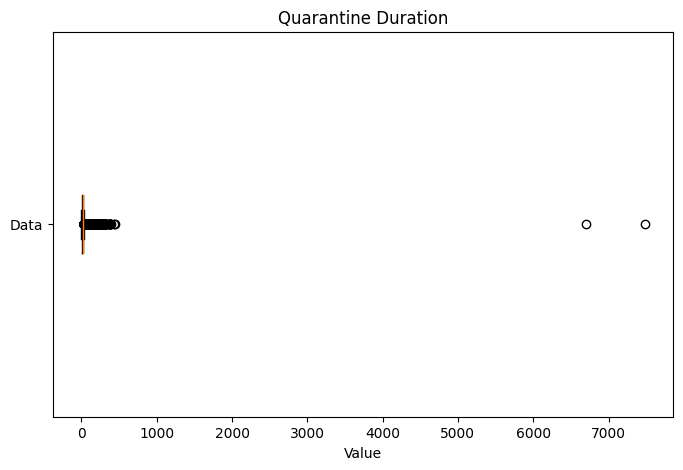

In [ ]:

# Create horizontal box plot
fig, ax = plt.subplots(figsize=(8,5))
ax.boxplot(df_confirmados['NumDias'], vert=False)

# Set plot properties
ax.set_title('Quarantine Duration')
ax.set_xlabel('Value')
ax.set_yticklabels(['Data'])
plt.show()

In [ ]:
df_confirmados = df_confirmados[df_confirmados['NumDias'] <= 250]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7fe3d14e20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7fe3d15360>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7fe3cf7be0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7fe3d158a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7fe3d15b40>],
 'means': []}

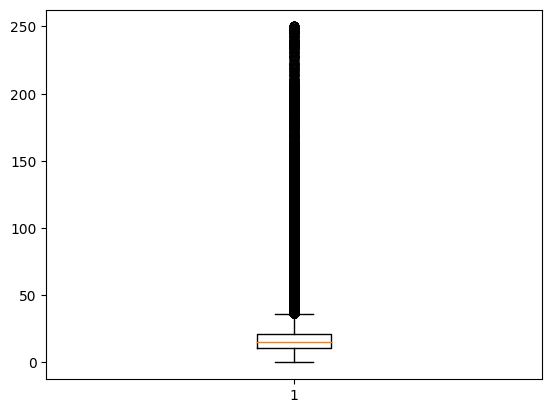

In [ ]:
plt.boxplot(df_confirmados['NumDias'])

In [ ]:
df_confirmados['NumDias'].describe()

count    188383.000000
mean         20.056242
std          18.408835
min           0.000000
25%          11.000000
50%          15.000000
75%          21.000000
max         250.000000
Name: NumDias, dtype: float64

<Axes: >

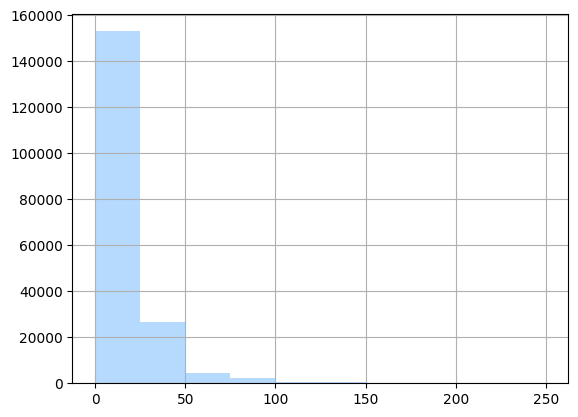

In [ ]:
df_confirmados['NumDias'].hist(color=['#b5dafe'])

In [ ]:
df_confirmados

,DataDiagnostico,Evolucao,CriterioConfirmacao,StatusNotificacao,FaixaEtaria,IdadeNaDataNotificacao,Sexo,RacaCor,Gestante,Febre,...,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado,ProfissionalSaude,PossuiDeficiencia,MoradorDeRua,DataFinal,Status,NumDias
409,2021-06-27,Cura,Laboratorial,Encerrado,20 a 29 anos,"24 anos, 2 meses, 8 dias",M,Parda,Não se aplica,Não,...,Não,Não,Não,Não,Não,Não,Não,2021-07-09,Cura,12
500,2021-06-29,Cura,Laboratorial,Encerrado,20 a 29 anos,"26 anos, 7 meses, 7 dias",M,Parda,Não se aplica,Não,...,Não,Não,Não,Não,Não,Não,Não,2021-07-09,Cura,10
1135,2021-06-16,Cura,Laboratorial,Encerrado,30 a 39 anos,"32 anos, 10 meses, 4 dias",M,Branca,Não se aplica,Sim,...,Não,Não,Não,Não,Não,Não,Não,2021-06-26,Cura,10
2275,2021-06-21,Cura,Clinico Epdemiologico,Encerrado,20 a 29 anos,"22 anos, 8 meses, 10 dias",F,Parda,Não,Não,...,Não,Não,Não,Não,Não,Não,Não,2021-06-30,Cura,9
3700,2021-07-05,Cura,Laboratorial,Encerrado,10 a 19 anos,"11 anos, 6 meses, 9 dias",F,Parda,Não,Não,...,Não,Não,Não,Não,Não,Não,Não,2021-07-09,Cura,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678890,2020-03-17,Cura,Laboratorial,Encerrado,50 a 59 anos,"54 anos, 0 meses, 6 dias",M,Branca,Não se aplica,Sim,...,Não,Não,Não,Não,Não,Não,Não,2020-04-15,Cura,29
1678892,2020-03-13,Cura,Laboratorial,Encerrado,20 a 29 anos,"28 anos, 6 meses, 1 dias",M,Parda,Não se aplica,Sim,...,Não,Não,Não,Não,Não,Não,Não,2020-04-15,Cura,33
1679056,2020-03-15,Cura,Laboratorial,Encerrado,40 a 49 anos,"41 anos, 8 meses, 29 dias",M,Branca,Não se aplica,Sim,...,Não,Não,Não,Não,Não,Não,Não,2020-04-14,Cura,30
1679130,2020-03-14,Cura,Laboratorial,Encerrado,50 a 59 anos,"57 anos, 11 meses, 1 dias",F,Parda,Não,Não,...,Não,Não,Não,Não,Não,Não,Não,2020-04-15,Cura,32


In [ ]:
df_confirmados['Sexo'].value_counts()

F    102959
M     85424
Name: Sexo, dtype: int64

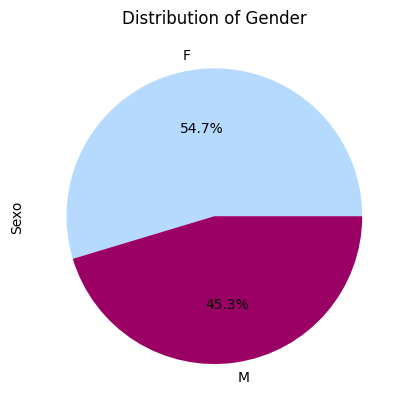

In [ ]:
# create a pie chart
df_confirmados['Sexo'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#b5dafe','#9b0065'])

# set the title
plt.title('Distribution of Gender')

# show the plot
plt.show()

In [ ]:
df_sobrevive = df_confirmados[df_confirmados['Status'] == 'Cura']
df_morre = df_confirmados[df_confirmados['Status'] != 'Cura']

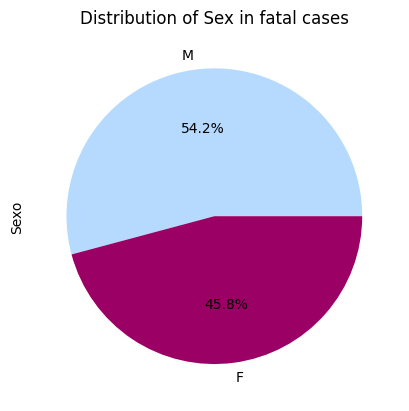

In [ ]:
# create a pie chart
df_morre['Sexo'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#b5dafe','#9b0065'])

# set the title
plt.title('Distribution of Sex in fatal cases')

# show the plot
plt.show()

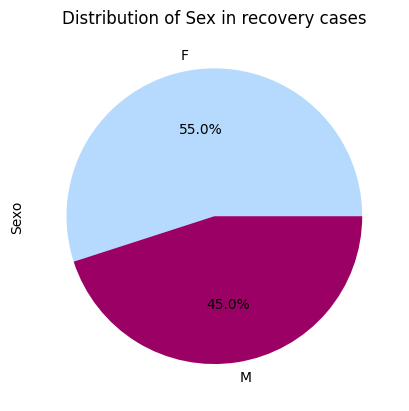

In [ ]:
# create a pie chart
df_sobrevive['Sexo'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#b5dafe','#9b0065'])

# set the title
plt.title('Distribution of Sex in recovery cases')

# show the plot
plt.show()

Now we will take care of age related data. One column for the concrete age and one column for the age-group.
<br>
Later on, we will **pick one** of them.

In [ ]:
def getAge(age):
  ans = age.split(' ')
  ans = ans[0]
  return int(ans)

df_confirmados['Idade'] = df_confirmados['IdadeNaDataNotificacao'].apply(getAge)

def get_decade(value):
  ans = str(value).split(' ')
  return int(ans[0])

df_confirmados['FaixaEtaria'] = df_confirmados['FaixaEtaria'].apply(get_decade)

In [ ]:
df_confirmados['Idade'].describe()

count    188383.000000
mean         41.038655
std          17.660980
min           0.000000
25%          28.000000
50%          39.000000
75%          53.000000
max         111.000000
Name: Idade, dtype: float64

<Axes: >

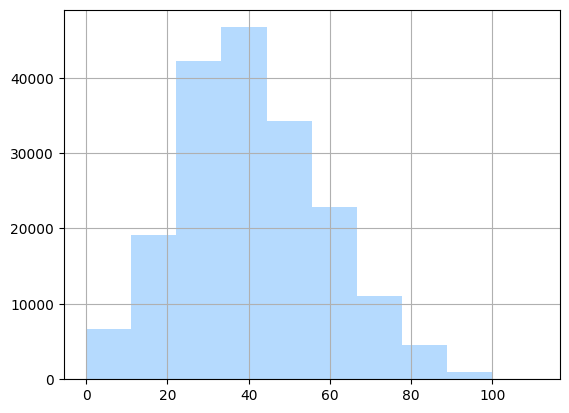

In [ ]:
df_confirmados['Idade'].hist(color=['#b5dafe'])

Removing columns that are redundant:

In [ ]:
df_confirmados = df_confirmados.drop(['StatusNotificacao','Evolucao','IdadeNaDataNotificacao'], axis=1)

Now we will take a look on features that are not symptoms nor chronic diseases.

In [ ]:
df_confirmados['Gestante'].value_counts()

Não                           101957
Não se aplica                  85237
3º trimeste                      518
2º trimeste                      367
1º trimeste                      247
Idade gestacional ignorada        57
Name: Gestante, dtype: int64

In [ ]:
df_confirmados['Gestante'] = df_confirmados['Gestante'].replace(['Não se aplica','Idade gestacional ignorada'],'Não')
df_confirmados['Gestante'] = df_confirmados['Gestante'].replace(['1º trimeste','2º trimeste','3º trimeste'],'Sim')

In [ ]:
df_confirmados['Gestante'].value_counts()

Não    187251
Sim      1132
Name: Gestante, dtype: int64

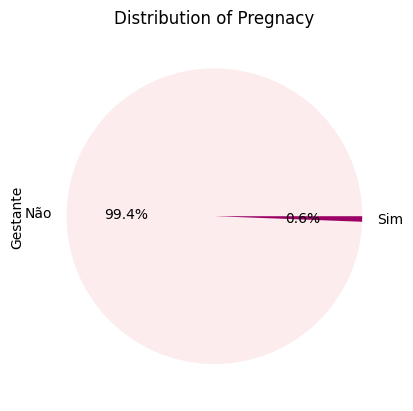

In [ ]:
# create a pie chart
df_confirmados['Gestante'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#fceced','#9b0065'])

# set the title
plt.title('Distribution of Pregnacy')

# show the plot
plt.show()

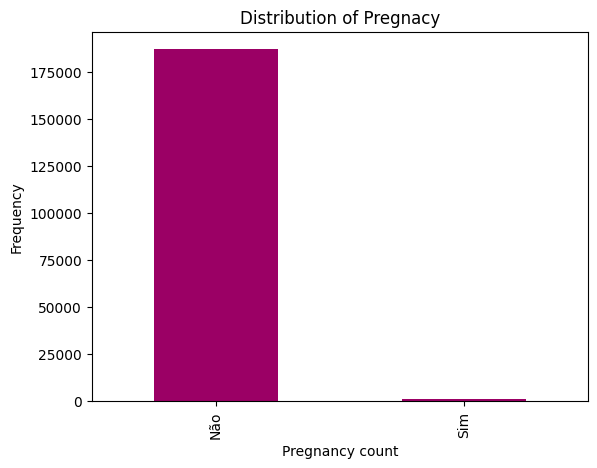

In [ ]:
# create a bar chart
df_confirmados['Gestante'].value_counts().plot(kind='bar', color='#9b0065')

# set the title and axis labels
plt.title('Distribution of Pregnacy')
plt.xlabel('Pregnancy count')
plt.ylabel('Frequency')

# show the plot
plt.show()

Less than 1% of the entries is actually pregnant, so we will disconsider this column. We **will not** be removing the entries that **are** pregnant.

In [ ]:
df_confirmados = df_confirmados.drop(['Gestante'], axis = 1)

Now we will see the info on healthcare professional:

In [ ]:
df_confirmados['ProfissionalSaude'].value_counts()

Não    173292
Sim     15091
Name: ProfissionalSaude, dtype: int64

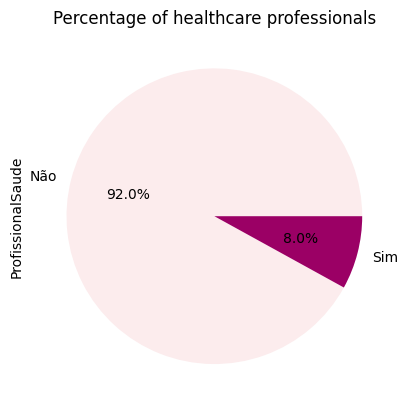

In [ ]:
# create a pie chart
df_confirmados['ProfissionalSaude'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#fceced','#9b0065'])

# set the title
plt.title('Percentage of healthcare professionals')

# show the plot
plt.show()

In [ ]:
df_confirmados['PossuiDeficiencia'].value_counts()

Não    184807
Sim      3576
Name: PossuiDeficiencia, dtype: int64

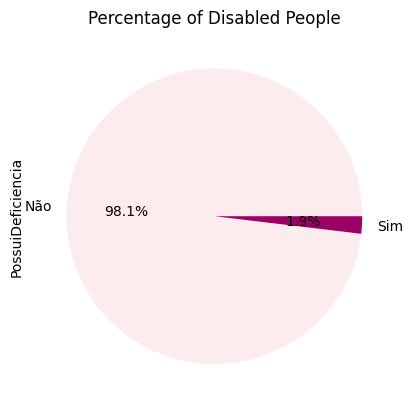

In [ ]:
# create a pie chart
df_confirmados['PossuiDeficiencia'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#fceced','#9b0065'])

# set the title
plt.title('Percentage of Disabled People')

# show the plot
plt.show()

In [ ]:
df_confirmados['FicouInternado'].value_counts()

Não    181038
Sim      7345
Name: FicouInternado, dtype: int64

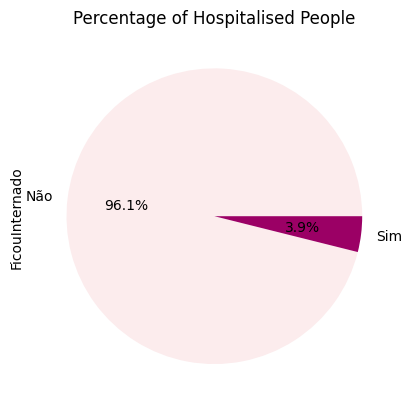

In [ ]:
# create a pie chart
df_confirmados['FicouInternado'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#fceced','#9b0065'])

# set the title
plt.title('Percentage of Hospitalised People')

# show the plot
plt.show()

In [ ]:
df_confirmados['RacaCor'].value_counts()

Parda       79845
Branca      79647
Amarela     14492
Preta       14166
Indigena      233
Name: RacaCor, dtype: int64

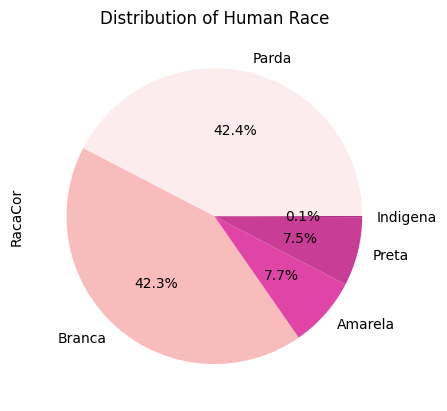

In [ ]:
# create a pie chart
df_confirmados['RacaCor'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#fceced','#f8bcbd','#e044a7','#c83d95','#9b0065'])

# set the title
plt.title('Distribution of Human Race')

# show the plot
plt.show()

Indigena, pode estar com esses valores por culturalmente não frequentarem hospitais.
<br>
**O que fazer neste caso?**

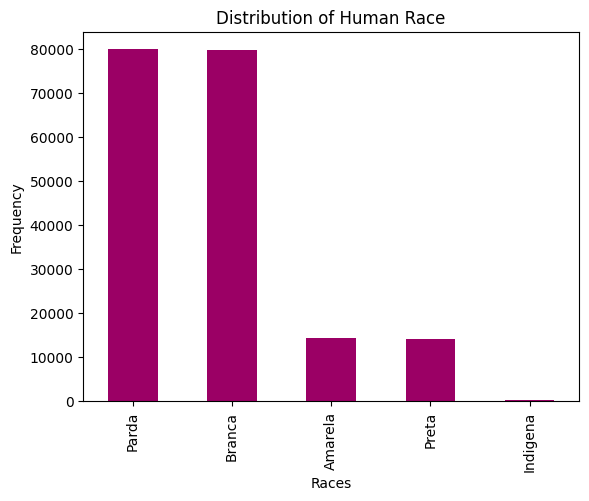

In [ ]:
# create a bar chart
df_confirmados['RacaCor'].value_counts().plot(kind='bar', color='#9b0065')

# set the title and axis labels
plt.title('Distribution of Human Race')
plt.xlabel('Races')
plt.ylabel('Frequency')

# show the plot
plt.show()

In [ ]:
df_confirmados['MoradorDeRua'].value_counts()

Não    187424
Sim       959
Name: MoradorDeRua, dtype: int64

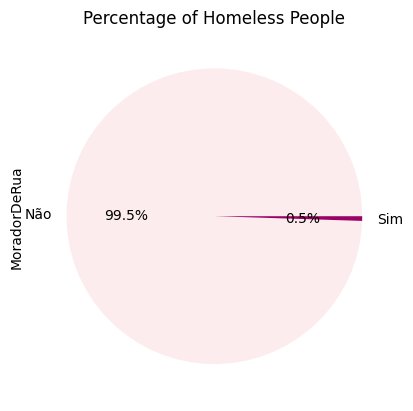

In [ ]:
# create a pie chart
df_confirmados['MoradorDeRua'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#fceced','#9b0065'])

# set the title
plt.title('Percentage of Homeless People')

# show the plot
plt.show()

Less than 1% of the entries are people that live on the street, so we will disconsider this column. We **will not** be removing the entries that **are** living on the street/are homeless.

In [ ]:
df_confirmados = df_confirmados.drop(['MoradorDeRua'], axis=1)

In [ ]:
df_confirmados['CriterioConfirmacao'].value_counts()

Laboratorial             178620
Clinico Epdemiologico      5290
Clinico                    4473
Name: CriterioConfirmacao, dtype: int64

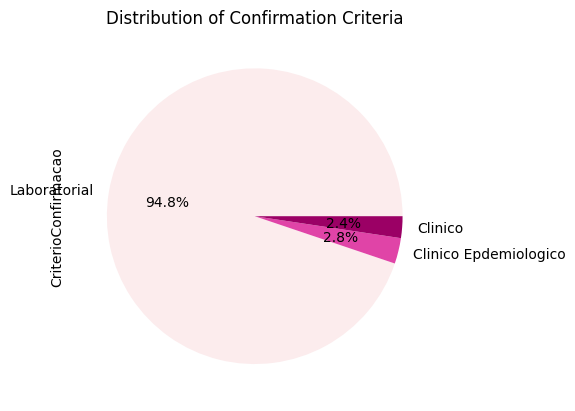

In [ ]:
# create a pie chart
df_confirmados['CriterioConfirmacao'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#fceced','#e044a7','#9b0065'])

# set the title
plt.title('Distribution of Confirmation Criteria')

# show the plot
plt.show()

In [ ]:
df_confirmados

,DataDiagnostico,CriterioConfirmacao,FaixaEtaria,Sexo,RacaCor,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,...,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado,ProfissionalSaude,PossuiDeficiencia,DataFinal,Status,NumDias,Idade
409,2021-06-27,Laboratorial,20,M,Parda,Não,Não,Não,Não,Não,...,Não,Não,Não,Não,Não,Não,2021-07-09,Cura,12,24
500,2021-06-29,Laboratorial,20,M,Parda,Não,Não,Não,Não,Sim,...,Não,Não,Não,Não,Não,Não,2021-07-09,Cura,10,26
1135,2021-06-16,Laboratorial,30,M,Branca,Sim,Não,Sim,Sim,Sim,...,Não,Não,Não,Não,Não,Não,2021-06-26,Cura,10,32
2275,2021-06-21,Clinico Epdemiologico,20,F,Parda,Não,Não,Sim,Não,Não,...,Não,Não,Não,Não,Não,Não,2021-06-30,Cura,9,22
3700,2021-07-05,Laboratorial,10,F,Parda,Não,Não,Sim,Sim,Sim,...,Não,Não,Não,Não,Não,Não,2021-07-09,Cura,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678890,2020-03-17,Laboratorial,50,M,Branca,Sim,Não,Sim,Não,Não,...,Não,Não,Não,Não,Não,Não,2020-04-15,Cura,29,54
1678892,2020-03-13,Laboratorial,20,M,Parda,Sim,Sim,Sim,Não,Sim,...,Não,Não,Não,Não,Não,Não,2020-04-15,Cura,33,28
1679056,2020-03-15,Laboratorial,40,M,Branca,Sim,Sim,Sim,Não,Não,...,Não,Não,Não,Não,Não,Não,2020-04-14,Cura,30,41
1679130,2020-03-14,Laboratorial,50,F,Parda,Não,Não,Não,Sim,Não,...,Não,Não,Não,Não,Não,Não,2020-04-15,Cura,32,57


In [ ]:
df_confirmados['Status'].value_counts()

Cura                   181755
Óbito pelo COVID-19      6628
Name: Status, dtype: int64

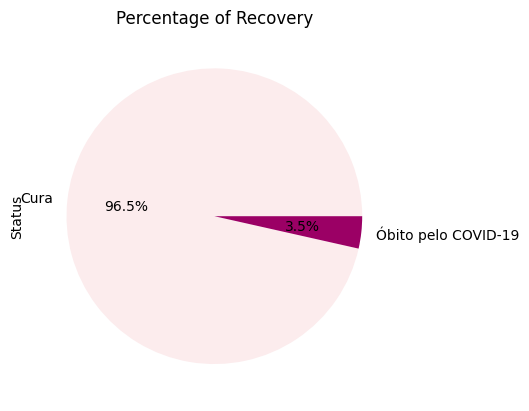

In [ ]:
# create a pie chart
df_confirmados['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#fceced','#9b0065'])

# set the title
plt.title('Percentage of Recovery')

# show the plot
plt.show()

Symptoms:

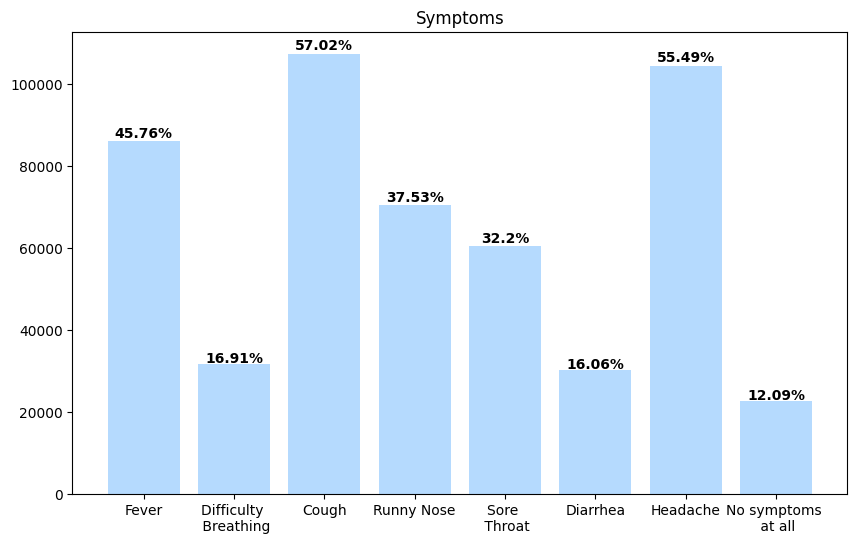

In [ ]:
x = ["Fever", "Difficulty \n Breathing", "Cough", "Runny Nose","Sore \n Throat",
     "Diarrhea","Headache","No symptoms \n at all"]

no_symptoms = len(df_confirmados[(df_confirmados['Febre'] == 'Não') & 
                             (df_confirmados['DificuldadeRespiratoria'] == 'Não') & 
                             (df_confirmados['Tosse'] == 'Não') &
                             (df_confirmados['Coriza'] == 'Não') &
                             (df_confirmados['DorGarganta'] == 'Não') &
                             (df_confirmados['Diarreia'] == 'Não') &
                             (df_confirmados['Cefaleia'] == 'Não')])

total = len(df_confirmados)

febre_sim = len(df_confirmados[df_confirmados['Febre']=='Sim'])
febre_nao = len(df_confirmados[df_confirmados['Febre']=='Não'])

respirar_sim = len(df_confirmados[df_confirmados["DificuldadeRespiratoria"]=='Sim'])
respirar_nao = len(df_confirmados[df_confirmados["DificuldadeRespiratoria"]=='Não'])

tosse_sim = len(df_confirmados[df_confirmados["Tosse"]=='Sim'])
tosse_nao = len(df_confirmados[df_confirmados["Tosse"]=='Não'])

coriza_sim = len(df_confirmados[df_confirmados["Coriza"]=='Sim'])
coriza_nao = len(df_confirmados[df_confirmados["Coriza"]=='Não'])

garganta_sim = len(df_confirmados[df_confirmados["DorGarganta"]=='Sim'])
garganta_nao = len(df_confirmados[df_confirmados["DorGarganta"]=='Não'])

diarreia_sim = len(df_confirmados[df_confirmados["Diarreia"]=='Sim'])
diarreia_nao = len(df_confirmados[df_confirmados["Diarreia"]=='Não'])

cefaleia_sim = len(df_confirmados[df_confirmados["Cefaleia"]=='Sim'])
cefaleia_nao = len(df_confirmados[df_confirmados["Cefaleia"]=='Não'])

y1=[febre_sim, respirar_sim, tosse_sim, coriza_sim, garganta_sim, diarreia_sim,
   cefaleia_sim, no_symptoms]

plt.figure(figsize=(10,6))

# compute percentage of each format
percentage = []
for i in range(len(y1)):
    pct = (y1[i]/total) * 100
    percentage.append(round(pct,2))

graph = plt.bar(x,y1, color = '#b5dafe')
plt.title('Symptoms')
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

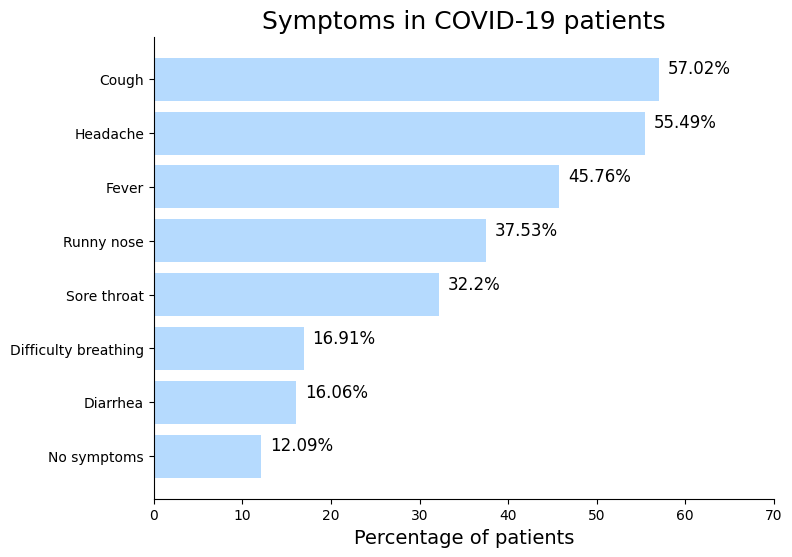

In [ ]:
import matplotlib.pyplot as plt

symptoms = ['Cough', 'Headache', 'Fever', 'Runny nose', 'Sore throat', 'Difficulty breathing', 'Diarrhea', 'No symptoms']
percentages = [57.02, 55.49, 45.76, 37.53, 32.2, 16.91, 16.06, 12.09]

fig, ax = plt.subplots(figsize=(8,6))

ax.barh(symptoms, percentages, align='center', color='#b5dafe')

for i, v in enumerate(percentages):
    ax.text(v + 1, i - 0.1, str(v) + '%', color='black', fontsize=12)

ax.set_xlim([0, 70])
ax.set_xlabel('Percentage of patients', fontsize=14)
ax.set_title('Symptoms in COVID-19 patients', fontsize=18)
ax.invert_yaxis()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()


**Chronic Diseases**

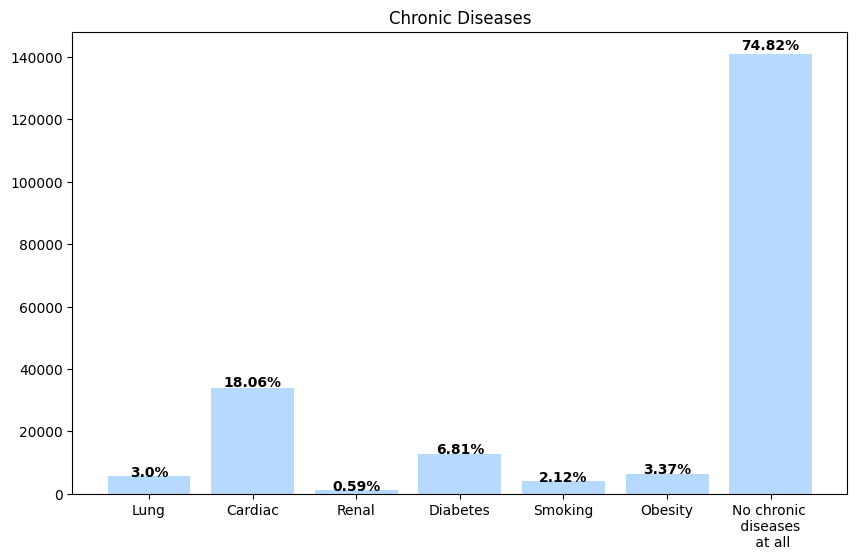

In [ ]:
x = ["Lung", "Cardiac", "Renal", "Diabetes","Smoking",
     "Obesity", "No chronic \n diseases \n at all"]

no_chronics = len(df_confirmados[(df_confirmados['ComorbidadeCardio'] == 'Não') & 
                             (df_confirmados['ComorbidadePulmao'] == 'Não') & 
                             (df_confirmados['ComorbidadeRenal'] == 'Não') &
                             (df_confirmados['ComorbidadeDiabetes'] == 'Não') &
                             (df_confirmados['ComorbidadeTabagismo'] == 'Não') &
                             (df_confirmados['ComorbidadeObesidade'] == 'Não')])

pulmao_sim = len(df_confirmados[df_confirmados['ComorbidadePulmao']=='Sim'])
pulmao_nao = len(df_confirmados[df_confirmados['ComorbidadePulmao']=='Não'])

cardio_sim = len(df_confirmados[df_confirmados["ComorbidadeCardio"]=='Sim'])
cardio_nao = len(df_confirmados[df_confirmados["ComorbidadeCardio"]=='Não'])

renal_sim = len(df_confirmados[df_confirmados["ComorbidadeRenal"]=='Sim'])
renal_nao = len(df_confirmados[df_confirmados["ComorbidadeRenal"]=='Não'])

diabetes_sim = len(df_confirmados[df_confirmados["ComorbidadeDiabetes"]=='Sim'])
diabetes_nao = len(df_confirmados[df_confirmados["ComorbidadeDiabetes"]=='Não'])

tabaco_sim = len(df_confirmados[df_confirmados["ComorbidadeTabagismo"]=='Sim'])
tabaco_nao = len(df_confirmados[df_confirmados["ComorbidadeTabagismo"]=='Não'])

obesidade_sim = len(df_confirmados[df_confirmados["ComorbidadeObesidade"]=='Sim'])
obesidade_nao = len(df_confirmados[df_confirmados["ComorbidadeObesidade"]=='Não'])


y1=[pulmao_sim, cardio_sim, renal_sim, diabetes_sim, tabaco_sim, obesidade_sim, no_chronics]

#y2 =[pulmao_nao, cardio_nao, renal_nao, diabetes_nao, tabaco_nao, obesidade_nao]


plt.figure(figsize=(10,6))

# compute percentage of each format
percentage = []
for i in range(len(y1)):
    pct = (y1[i]/total) * 100
    percentage.append(round(pct,2))

graph = plt.bar(x,y1, color = '#b5dafe')
plt.title('Chronic Diseases')
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

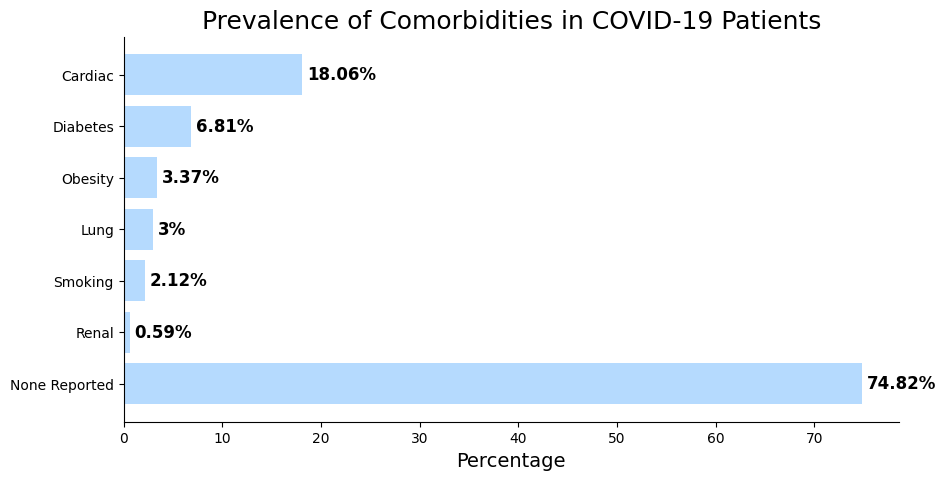

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
comorbidities = ['Cardiac', 'Diabetes', 'Obesity', 'Lung', 'Smoking', 'Renal', 'None Reported']
percentages = [18.06, 6.81, 3.37, 3, 2.12, 0.59, 74.82]

# Horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 5))

# Remove box border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.invert_yaxis()

# Create horizontal bars
bars = ax.barh(comorbidities, percentages, color='#b5dafe')

# Add percentage labels to the end of each bar
for i, bar in enumerate(bars):
    ax.text(bar.get_width()+0.5, bar.get_y()+bar.get_height()/2, str(round(percentages[i],2))+'%', 
            va='center', color='black', fontweight='bold',fontsize=12)

# X-axis label
ax.set_xlabel('Percentage', fontsize=14)

# Title
ax.set_title('Prevalence of Comorbidities in COVID-19 Patients', fontsize=18)

# Show plot
plt.show()


## Hospitalized VS Death

In [ ]:
df_sobreviventes = df_confirmados[df_confirmados['Status'] == 'Cura']
df_falecidos = df_confirmados[df_confirmados['Status'] != 'Cura']

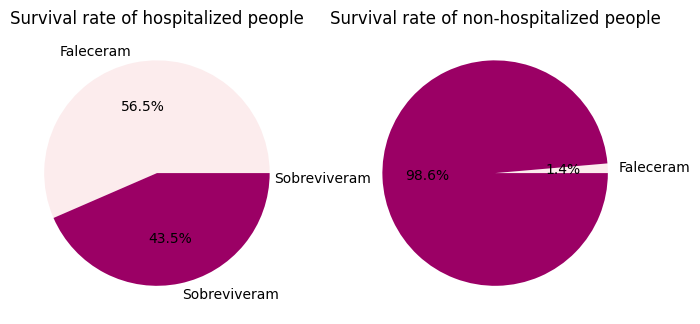

In [ ]:
num_falecidos_internados = len(df_falecidos[df_falecidos['FicouInternado'] == 'Sim'])
num_falecidos_nao_internados = len(df_falecidos[df_falecidos['FicouInternado'] != 'Sim'])

num_sobreviventes_internados = len(df_sobreviventes[df_sobreviventes['FicouInternado'] == 'Sim'])
num_sobreviventes_nao_internados = len(df_sobreviventes[df_sobreviventes['FicouInternado'] != 'Sim'])

data1 = [num_falecidos_internados,num_sobreviventes_internados]
labels1 = ['Faleceram','Sobreviveram']

data2 = [num_falecidos_nao_internados,num_sobreviventes_nao_internados]
labels2 = ['Faleceram', 'Sobreviveram']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.pie(data1, labels=labels1, autopct='%1.1f%%', colors=['#fceced','#9b0065'])
ax1.set_title('Survival rate of hospitalized people')

ax2.pie(data2, labels=labels2, autopct='%1.1f%%', colors=['#fceced','#9b0065'])
ax2.set_title('Survival rate of non-hospitalized people')

plt.show()

## Race VS Death

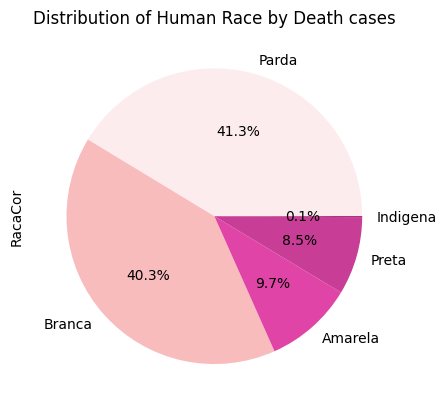

In [ ]:
# create a pie chart
df_falecidos['RacaCor'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#fceced','#f8bcbd','#e044a7','#c83d95','#9b0065'])

# set the title
plt.title('Distribution of Human Race by Death cases')

# show the plot
plt.show()

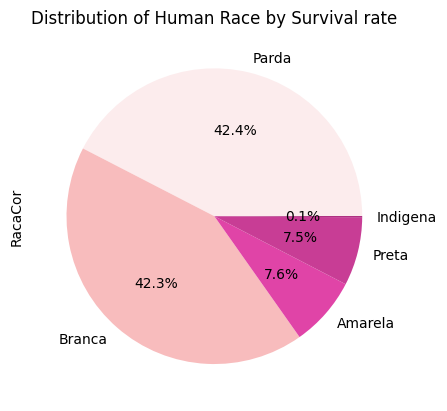

In [ ]:
# create a pie chart
df_sobreviventes['RacaCor'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#fceced','#f8bcbd','#e044a7','#c83d95','#9b0065'])

# set the title
plt.title('Distribution of Human Race by Survival rate')

# show the plot
plt.show()

Não nos diz nada de novo.

## Race VS Death VS Hospitalized

### Survivors:

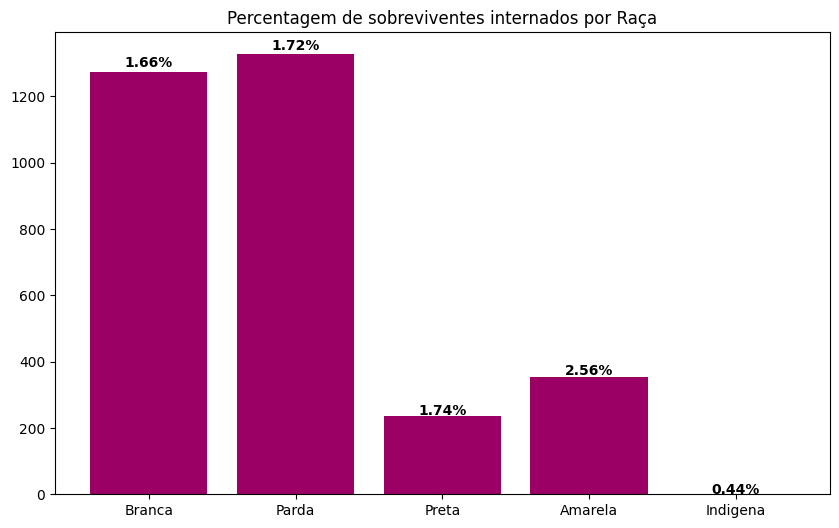

In [ ]:
# Survivors
x1 = ['Branca','Parda','Preta','Amarela','Indigena']

num_branca_internados = len(df_sobreviventes[(df_sobreviventes['RacaCor'] == 'Branca') & (df_sobreviventes['FicouInternado'] == 'Sim')])
total_brancos = len(df_sobreviventes[df_sobreviventes['RacaCor'] == 'Branca'])
num_branca_nao_internados = len(df_sobreviventes[(df_sobreviventes['RacaCor'] == 'Branca') & (df_sobreviventes['FicouInternado'] != 'Sim')])

num_parda_internados = len(df_sobreviventes[(df_sobreviventes['RacaCor'] == 'Parda') & (df_sobreviventes['FicouInternado'] == 'Sim')])
total_pardos = len(df_sobreviventes[df_sobreviventes['RacaCor'] == 'Parda'])
num_parda_nao_internados = len(df_sobreviventes[(df_sobreviventes['RacaCor'] == 'Parda') & (df_sobreviventes['FicouInternado'] != 'Sim')])

num_preta_internados = len(df_sobreviventes[(df_sobreviventes['RacaCor'] == 'Preta') & (df_sobreviventes['FicouInternado'] == 'Sim')])
total_pretos = len(df_sobreviventes[df_sobreviventes['RacaCor'] == 'Preta'])
num_preta_nao_internados = len(df_sobreviventes[(df_sobreviventes['RacaCor'] == 'Preta') & (df_sobreviventes['FicouInternado'] != 'Sim')])

num_amarela_internados = len(df_sobreviventes[(df_sobreviventes['RacaCor'] == 'Amarela') & (df_sobreviventes['FicouInternado'] == 'Sim')])
total_amarelos = len(df_sobreviventes[df_sobreviventes['RacaCor'] == 'Amarela'])
num_amarela_nao_internados = len(df_sobreviventes[(df_sobreviventes['RacaCor'] == 'Amarela') & (df_sobreviventes['FicouInternado'] != 'Sim')])

num_indigena_internados = len(df_sobreviventes[(df_sobreviventes['RacaCor'] == 'Indigena') & (df_sobreviventes['FicouInternado'] == 'Sim')])
total_indigenos = len(df_sobreviventes[df_sobreviventes['RacaCor'] == 'Indigena'])
num_indigena_nao_internados = len(df_sobreviventes[(df_sobreviventes['RacaCor'] == 'Indigena') & (df_sobreviventes['FicouInternado'] != 'Sim')])


y1 = [num_branca_internados,num_parda_internados,num_preta_internados,num_amarela_internados,num_indigena_internados]
totais = [total_brancos,total_pardos,total_pretos,total_amarelos,total_indigenos]
y2 = [num_branca_nao_internados,num_parda_nao_internados,num_preta_nao_internados,num_amarela_nao_internados,num_indigena_nao_internados]


plt.figure(figsize=(10,6))

# compute percentage of each format
percentage = []
for i in range(len(y1)):
    pct = (y1[i]/totais[i]) * 100
    percentage.append(round(pct,2))

graph = plt.bar(x1,y1, color = '#9b0065')
plt.title('Percentagem de sobreviventes internados por Raça')
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()



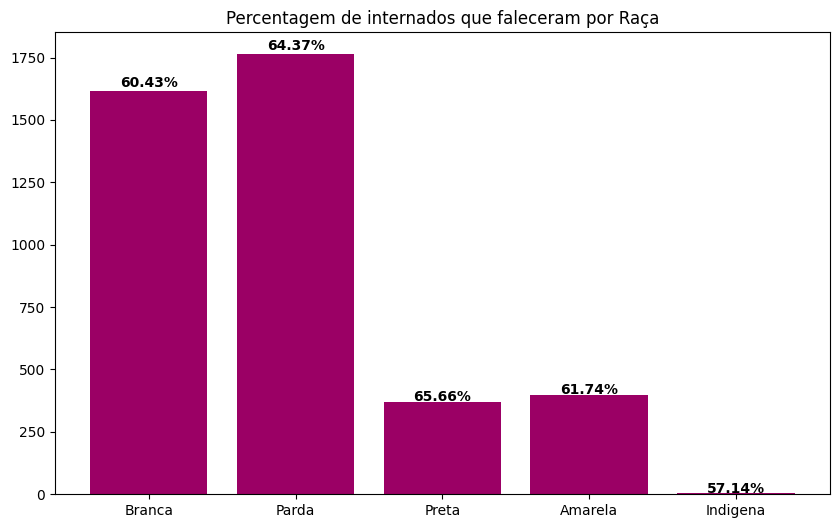

In [ ]:
# Casualties
x1 = ['Branca','Parda','Preta','Amarela','Indigena']

num_branca_internados = len(df_falecidos[(df_falecidos['RacaCor'] == 'Branca') & (df_falecidos['FicouInternado'] == 'Sim')])
total_brancos = len(df_falecidos[df_falecidos['RacaCor'] == 'Branca'])
num_branca_nao_internados = len(df_falecidos[(df_falecidos['RacaCor'] == 'Branca') & (df_falecidos['FicouInternado'] != 'Sim')])

num_parda_internados = len(df_falecidos[(df_falecidos['RacaCor'] == 'Parda') & (df_falecidos['FicouInternado'] == 'Sim')])
total_pardos = len(df_falecidos[df_falecidos['RacaCor'] == 'Parda'])
num_parda_nao_internados = len(df_falecidos[(df_falecidos['RacaCor'] == 'Parda') & (df_falecidos['FicouInternado'] != 'Sim')])

num_preta_internados = len(df_falecidos[(df_falecidos['RacaCor'] == 'Preta') & (df_falecidos['FicouInternado'] == 'Sim')])
total_pretos = len(df_falecidos[df_falecidos['RacaCor'] == 'Preta'])
num_preta_nao_internados = len(df_falecidos[(df_falecidos['RacaCor'] == 'Preta') & (df_falecidos['FicouInternado'] != 'Sim')])

num_amarela_internados = len(df_falecidos[(df_falecidos['RacaCor'] == 'Amarela') & (df_falecidos['FicouInternado'] == 'Sim')])
total_amarelos = len(df_falecidos[df_falecidos['RacaCor'] == 'Amarela'])
num_amarela_nao_internados = len(df_falecidos[(df_falecidos['RacaCor'] == 'Amarela') & (df_falecidos['FicouInternado'] != 'Sim')])

num_indigena_internados = len(df_falecidos[(df_falecidos['RacaCor'] == 'Indigena') & (df_falecidos['FicouInternado'] == 'Sim')])
total_indigenos = len(df_falecidos[df_falecidos['RacaCor'] == 'Indigena'])
num_indigena_nao_internados = len(df_falecidos[(df_falecidos['RacaCor'] == 'Indigena') & (df_falecidos['FicouInternado'] != 'Sim')])


y1 = [num_branca_internados,num_parda_internados,num_preta_internados,num_amarela_internados,num_indigena_internados]
totais = [total_brancos,total_pardos,total_pretos,total_amarelos,total_indigenos]
y12 = [num_branca_nao_internados,num_parda_nao_internados,num_preta_nao_internados,num_amarela_nao_internados,num_indigena_nao_internados]

plt.figure(figsize=(10,6))

# compute percentage of each format
percentage = []
for i in range(len(y1)):
    pct = (y1[i]/totais[i]) * 100
    percentage.append(round(pct,2))

graph = plt.bar(x1,y1, color = '#9b0065')
plt.title('Percentagem de internados que faleceram por Raça')
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

## Race VS Symptoms

In [ ]:
df_febre = df_confirmados[df_confirmados['Febre'] == 'Sim']
df_respirar = df_confirmados[df_confirmados['DificuldadeRespiratoria'] == 'Sim']
df_tosse = df_confirmados[df_confirmados['Tosse'] == 'Sim']
df_coriza = df_confirmados[df_confirmados['Coriza'] == 'Sim']
df_garganta = df_confirmados[df_confirmados['DorGarganta'] == 'Sim']
df_diarreia = df_confirmados[df_confirmados['Diarreia'] == 'Sim']
df_cefaleia = df_confirmados[df_confirmados['Cefaleia'] == 'Sim']

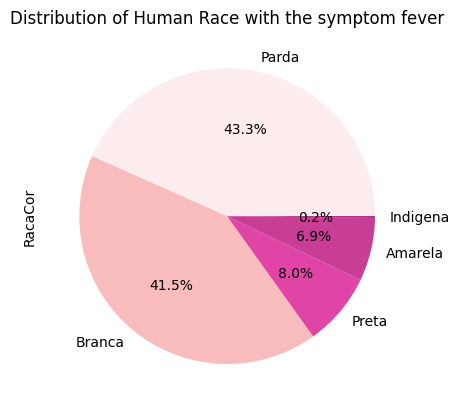

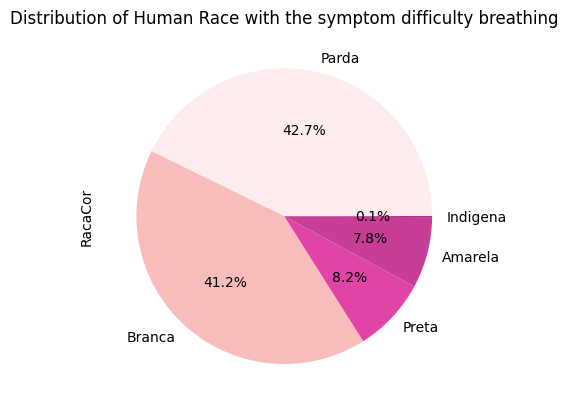

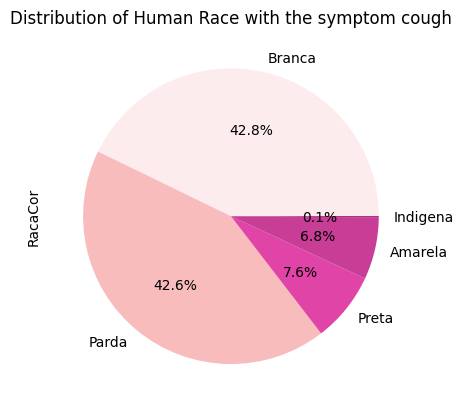

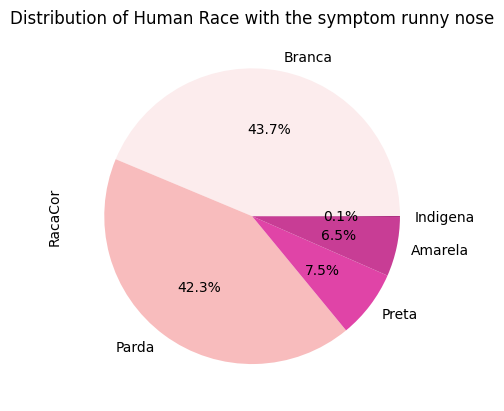

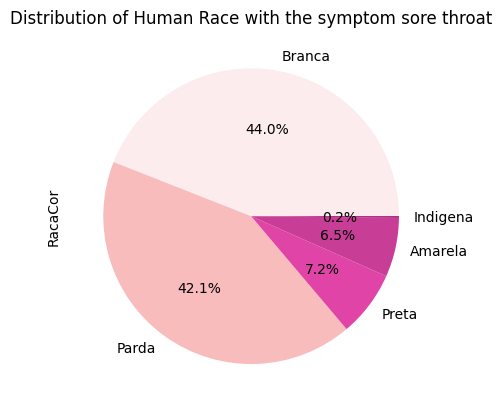

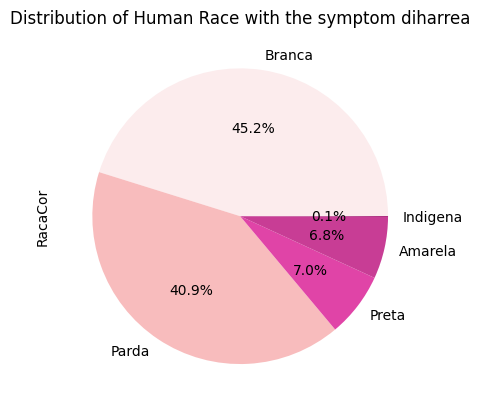

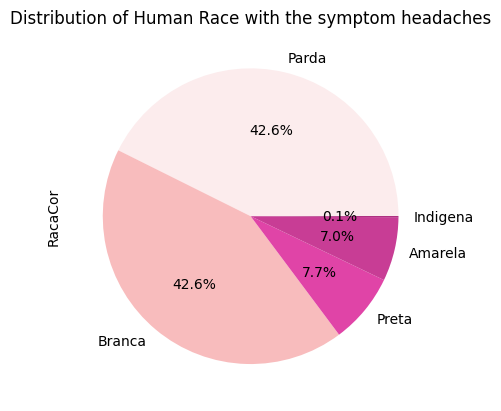

In [ ]:
# create a pie chart
df_febre['RacaCor'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#fceced','#f8bcbd','#e044a7','#c83d95','#9b0065'])

# set the title
plt.title('Distribution of Human Race with the symptom fever')

# show the plot
plt.show()



# create a pie chart
df_respirar['RacaCor'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#fceced','#f8bcbd','#e044a7','#c83d95','#9b0065'])

# set the title
plt.title('Distribution of Human Race with the symptom difficulty breathing')

# show the plot
plt.show()



# create a pie chart
df_tosse['RacaCor'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#fceced','#f8bcbd','#e044a7','#c83d95','#9b0065'])

# set the title
plt.title('Distribution of Human Race with the symptom cough')

# show the plot
plt.show()



# create a pie chart
df_coriza['RacaCor'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#fceced','#f8bcbd','#e044a7','#c83d95','#9b0065'])

# set the title
plt.title('Distribution of Human Race with the symptom runny nose')

# show the plot
plt.show()



# create a pie chart
df_garganta['RacaCor'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#fceced','#f8bcbd','#e044a7','#c83d95','#9b0065'])

# set the title
plt.title('Distribution of Human Race with the symptom sore throat')

# show the plot
plt.show()



# create a pie chart
df_diarreia['RacaCor'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#fceced','#f8bcbd','#e044a7','#c83d95','#9b0065'])

# set the title
plt.title('Distribution of Human Race with the symptom diharrea')

# show the plot
plt.show()



# create a pie chart
df_cefaleia['RacaCor'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#fceced','#f8bcbd','#e044a7','#c83d95','#9b0065'])

# set the title
plt.title('Distribution of Human Race with the symptom headaches')

# show the plot
plt.show()

In [ ]:
df_confirmados

,DataDiagnostico,CriterioConfirmacao,FaixaEtaria,Sexo,RacaCor,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,...,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado,ProfissionalSaude,PossuiDeficiencia,DataFinal,Status,NumDias,Idade
409,2021-06-27,Laboratorial,20,M,Parda,Não,Não,Não,Não,Não,...,Não,Não,Não,Não,Não,Não,2021-07-09,Cura,12,24
500,2021-06-29,Laboratorial,20,M,Parda,Não,Não,Não,Não,Sim,...,Não,Não,Não,Não,Não,Não,2021-07-09,Cura,10,26
1135,2021-06-16,Laboratorial,30,M,Branca,Sim,Não,Sim,Sim,Sim,...,Não,Não,Não,Não,Não,Não,2021-06-26,Cura,10,32
2275,2021-06-21,Clinico Epdemiologico,20,F,Parda,Não,Não,Sim,Não,Não,...,Não,Não,Não,Não,Não,Não,2021-06-30,Cura,9,22
3700,2021-07-05,Laboratorial,10,F,Parda,Não,Não,Sim,Sim,Sim,...,Não,Não,Não,Não,Não,Não,2021-07-09,Cura,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678890,2020-03-17,Laboratorial,50,M,Branca,Sim,Não,Sim,Não,Não,...,Não,Não,Não,Não,Não,Não,2020-04-15,Cura,29,54
1678892,2020-03-13,Laboratorial,20,M,Parda,Sim,Sim,Sim,Não,Sim,...,Não,Não,Não,Não,Não,Não,2020-04-15,Cura,33,28
1679056,2020-03-15,Laboratorial,40,M,Branca,Sim,Sim,Sim,Não,Não,...,Não,Não,Não,Não,Não,Não,2020-04-14,Cura,30,41
1679130,2020-03-14,Laboratorial,50,F,Parda,Não,Não,Não,Sim,Não,...,Não,Não,Não,Não,Não,Não,2020-04-15,Cura,32,57


In [ ]:
df_final = df_confirmados.drop(['CriterioConfirmacao','FicouInternado','ProfissionalSaude','PossuiDeficiencia'], axis=1)
df_final = df_final.replace(['M','Não','Cura'],0)
df_final = df_final.replace(['F','Sim','Óbito pelo COVID-19'],1)

In [ ]:
df_final = pd.get_dummies(df_final, columns = ['RacaCor'])

In [ ]:
df_final

,DataDiagnostico,FaixaEtaria,Sexo,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,...,ComorbidadeObesidade,DataFinal,Status,NumDias,Idade,RacaCor_Amarela,RacaCor_Branca,RacaCor_Indigena,RacaCor_Parda,RacaCor_Preta
409,2021-06-27,20,0,0,0,0,0,0,0,0,...,0,2021-07-09,0,12,24,0,0,0,1,0
500,2021-06-29,20,0,0,0,0,0,1,0,1,...,0,2021-07-09,0,10,26,0,0,0,1,0
1135,2021-06-16,30,0,1,0,1,1,1,0,1,...,0,2021-06-26,0,10,32,0,1,0,0,0
2275,2021-06-21,20,1,0,0,1,0,0,0,0,...,0,2021-06-30,0,9,22,0,0,0,1,0
3700,2021-07-05,10,1,0,0,1,1,1,0,0,...,0,2021-07-09,0,4,11,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678890,2020-03-17,50,0,1,0,1,0,0,0,1,...,0,2020-04-15,0,29,54,0,1,0,0,0
1678892,2020-03-13,20,0,1,1,1,0,1,0,1,...,0,2020-04-15,0,33,28,0,0,0,1,0
1679056,2020-03-15,40,0,1,1,1,0,0,0,0,...,0,2020-04-14,0,30,41,0,1,0,0,0
1679130,2020-03-14,50,1,0,0,0,1,0,0,0,...,0,2020-04-15,0,32,57,0,0,0,1,0


In [ ]:
df_para_cluster = df_final.copy()
df_para_cluster = df_para_cluster.drop(['DataDiagnostico','DataFinal'], axis = 1)

In [ ]:
from google.colab import files
df_para_cluster.to_csv("df_para_cluster.csv", encoding='utf-8')
files.download('df_para_cluster.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data = pd.read_csv('df_para_cluster.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

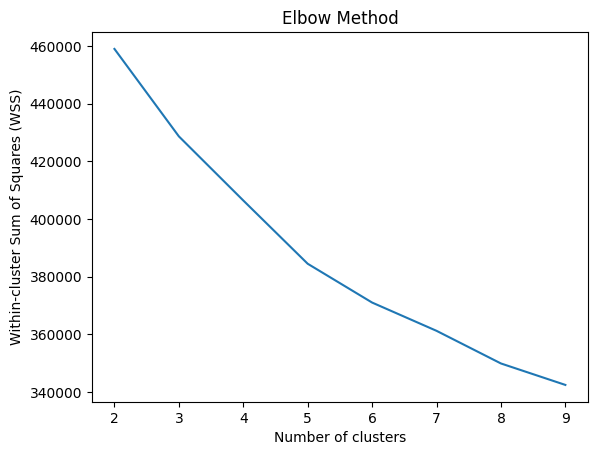

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Normalize the data
data_norm = (data - data.min()) / (data.max() - data.min())

# Calculate the distances using Jaccard's distance
def jaccard_distance(a, b):
    return 1 - np.sum(np.minimum(a, b)) / np.sum(np.maximum(a, b))

# Set the range of clusters to test
k_range = range(2, 10)

# Apply the elbow method to determine the optimal number of clusters
wss = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_norm)
    wss.append(kmeans.inertia_)
plt.plot(k_range, wss)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method')
plt.show()

# Apply the silhouette method to determine the optimal number of clusters
sil_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_norm)
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(data_norm, labels, metric=jaccard_distance))
plt.plot(k_range, sil_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

# Print the optimal number of clusters for both methods
optimal_clusters_elbow = np.argmin(np.diff(wss)) + 2
optimal_clusters_silhouette = k_range[np.argmax(sil_scores)]
print(f"Optimal number of clusters (Elbow Method): {optimal_clusters_elbow}")
print(f"Optimal number of clusters (Silhouette Method): {optimal_clusters_silhouette}")


In [ ]:
df_final['cluster_clara'].value_counts()

-1    188383
Name: cluster_clara, dtype: int64

In [ ]:
from pyclustering.cluster.clarans import clarans;
from pyclustering.utils import timedcall;
from sklearn import datasets


"""!
The pyclustering library clarans implementation requires
list of lists as its input dataset.
Thus we convert the data from numpy array to list.
"""
data = data.values.tolist()

#get a glimpse of dataset
print("A peek into the dataset : ",data)


"""!
@brief Constructor of clustering algorithm CLARANS.
@details The higher the value of maxneighbor, the closer is CLARANS to K-Medoids, and the longer is each search of a local minima.
@param[in] data: Input data that is presented as list of points (objects), each point should be represented by list or tuple.
@param[in] number_clusters: amount of clusters that should be allocated.
@param[in] numlocal: the number of local minima obtained (amount of iterations for solving the problem).
@param[in] maxneighbor: the maximum number of neighbors examined.        
"""
clarans_instance = clarans(data, 3, 6, 4);

#calls the clarans method 'process' to implement the algortihm
(ticks, result) = timedcall(clarans_instance.process);
print("Execution time : ", ticks, "\n");

#returns the clusters 
clusters = clarans_instance.get_clusters();

#returns the mediods 
medoids = clarans_instance.get_medoids();


print("Index of the points that are in a cluster : ",clusters)
print("The index of medoids that algorithm found to be best : ",medoids)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

# Load data
data = df_para_cluster

# Define number of clusters and number of samples to use in medoids search
k = 3
num_medoids = 100

# Calculate pairwise distance matrix
dist_matrix = pairwise_distances(data, metric='euclidean')

# Initialize best medoids and best cost
best_medoids = None
best_cost = float('inf')

# Repeat CLARA algorithm with different medoid samples
for i in range(num_medoids):
    # Randomly sample medoids
    medoid_indices = np.random.choice(len(data), k, replace=False)
    medoids = data[medoid_indices]

    # Initialize KMeans object with medoids
    kmeans = KMeans(n_clusters=k, init=medoids, n_init=1)

    # Fit data to KMeans object
    kmeans.fit(data)

    # Get cluster labels and calculate cost
    labels = kmeans.labels_
    cost = sum(dist_matrix[i, j] for i in range(len(data)) for j in range(len(data)) if labels[i] == labels[j])

    # Update best medoids and best cost if necessary
    if cost < best_cost:
        best_medoids = medoids
        best_cost = cost

# Initialize KMeans object with best medoids
kmeans = KMeans(n_clusters=k, init=best_medoids, n_init=1)

# Fit data to KMeans object
kmeans.fit(data)

# Get cluster labels
labels = kmeans.labels_

df_final['cluster_clara'] = labels

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram


# Define the variables to be scaled
num_cols = ['Idade','FaixaEtaria', 'NumDias']

# Create a column transformer to scale and one-hot encode the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols)
    ])

# Fit and transform the data using the preprocessor
X = preprocessor.fit_transform(df_final)

# Apply factor analysis of mixed data
fa = FactorAnalysis(n_components=3)
X_fa = fa.fit_transform(X)

# Apply agglomerative hierarchical clustering
dist_matrix = pdist(X_fa, metric='euclidean')
linkage_matrix = linkage(dist_matrix, method='ward')
dendrogram(linkage_matrix)

# Visualize the dendrogram
import matplotlib.pyplot as plt
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Fit the clustering model
n_clusters = 4
cluster_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = cluster_model.fit_predict(X_fa)

# Add the cluster labels to the original dataset
df_final['cluster'] = cluster_labels

# Print the results
print(df_final.groupby('cluster').mean())


In [ ]:
from google.colab import files
df_final.to_csv("df_final.csv", encoding='utf-8')
files.download('df_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_final

,DataDiagnostico,FaixaEtaria,Sexo,RacaCor,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,...,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,DataFinal,Status,NumDias,Idade
409,2021-06-27,20,M,Parda,Não,Não,Não,Não,Não,Não,...,Não,Não,Não,Não,Não,Não,2021-07-09,Cura,12,24
500,2021-06-29,20,M,Parda,Não,Não,Não,Não,Sim,Não,...,Não,Não,Não,Não,Não,Não,2021-07-09,Cura,10,26
1135,2021-06-16,30,M,Branca,Sim,Não,Sim,Sim,Sim,Não,...,Não,Não,Não,Não,Não,Não,2021-06-26,Cura,10,32
2275,2021-06-21,20,F,Parda,Não,Não,Sim,Não,Não,Não,...,Não,Não,Não,Não,Não,Não,2021-06-30,Cura,9,22
3700,2021-07-05,10,F,Parda,Não,Não,Sim,Sim,Sim,Não,...,Não,Não,Não,Não,Não,Não,2021-07-09,Cura,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678890,2020-03-17,50,M,Branca,Sim,Não,Sim,Não,Não,Não,...,Não,Não,Não,Não,Não,Não,2020-04-15,Cura,29,54
1678892,2020-03-13,20,M,Parda,Sim,Sim,Sim,Não,Sim,Não,...,Não,Não,Não,Não,Não,Não,2020-04-15,Cura,33,28
1679056,2020-03-15,40,M,Branca,Sim,Sim,Sim,Não,Não,Não,...,Não,Não,Não,Não,Não,Não,2020-04-14,Cura,30,41
1679130,2020-03-14,50,F,Parda,Não,Não,Não,Sim,Não,Não,...,Não,Não,Não,Não,Não,Não,2020-04-15,Cura,32,57


# Clustering

In [ ]:
one_hot_encoded_data = pd.get_dummies(df_confirmados, columns = ['CriterioConfirmacao', 'RacaCor'])

In [ ]:
one_hot_encoded_data = df_para_cluster

In [ ]:
one_hot_encoded_data = one_hot_encoded_data.replace('Sim',1)
one_hot_encoded_data = one_hot_encoded_data.replace('Não',0)
one_hot_encoded_data = one_hot_encoded_data.replace('M',0)
one_hot_encoded_data = one_hot_encoded_data.replace('F',1)
one_hot_encoded_data = one_hot_encoded_data.replace('Cura',1)
one_hot_encoded_data = one_hot_encoded_data.replace('Óbito pelo COVID-19',0)

In [ ]:
one_hot_encoded_data = one_hot_encoded_data.drop(['FaixaEtaria'],axis=1)

In [ ]:
df_all = one_hot_encoded_data.loc[:, ~one_hot_encoded_data.columns.isin(['DataDiagnostico','DataFinal'])]

In [ ]:
from google.colab import files
df.to_csv("df_all.csv", encoding='utf-8')
files.download('df_all.csv') 

In [ ]:
df_all

,Sexo,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,...,ComorbidadeTabagismo,ComorbidadeObesidade,Status,NumDias,Idade,RacaCor_Amarela,RacaCor_Branca,RacaCor_Indigena,RacaCor_Parda,RacaCor_Preta
409,0,0,0,0,0,0,0,0,0,0,...,0,0,0,12,24,0,0,0,1,0
500,0,0,0,0,0,1,0,1,0,0,...,0,0,0,10,26,0,0,0,1,0
1135,0,1,0,1,1,1,0,1,0,0,...,0,0,0,10,32,0,1,0,0,0
2275,1,0,0,1,0,0,0,0,0,0,...,0,0,0,9,22,0,0,0,1,0
3700,1,0,0,1,1,1,0,0,0,0,...,0,0,0,4,11,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678890,0,1,0,1,0,0,0,1,0,0,...,0,0,0,29,54,0,1,0,0,0
1678892,0,1,1,1,0,1,0,1,0,0,...,0,0,0,33,28,0,0,0,1,0
1679056,0,1,1,1,0,0,0,0,0,0,...,0,0,0,30,41,0,1,0,0,0
1679130,1,0,0,0,1,0,0,0,0,0,...,0,0,0,32,57,0,0,0,1,0


In [ ]:
df_sintomas = one_hot_encoded_data.loc[:,['Febre',
                                          'DificuldadeRespiratoria',
                                          'Tosse','Coriza','DorGarganta',
                                          'Diarreia','Cefaleia']]
#df_sintomas

In [ ]:
df_cronicas = one_hot_encoded_data.loc[:,['ComorbidadePulmao',
                                          'ComorbidadeCardio',
                                          'ComorbidadeRenal',
                                          'ComorbidadeDiabetes',
                                          'ComorbidadeTabagismo',
                                          'ComorbidadeObesidade']]
#df_cronicas

## df_all

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Normalize the data
data_norm = (df_all - df_all.min()) / (df_all.max() - df_all.min())

# Calculate the distances using Jaccard's distance
def jaccard_distance(a, b):
    return 1 - np.sum(np.minimum(a, b)) / np.sum(np.maximum(a, b))

# Set the range of clusters to test
k_range = range(2, 21)

# Apply the elbow method to determine the optimal number of clusters
wss = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_norm)
    wss.append(kmeans.inertia_)
plt.plot(k_range, wss)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method')
plt.show()

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

# Normalize the data
#data_norm = (df_all - df_all.min()) / (df_all.max() - df_all.min())



def optimal_num_clusters(X):
    wcss = []
    for i in range(1,10):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    diff = np.diff(wcss)
    diff_r = diff[1:] / diff[:-1]
    elbow_index = np.argmin(diff_r) + 1
    return elbow_index

   

opt_clusters = optimal_num_clusters(df_all)
print("Optimal number of clusters: ", opt_clusters)

Optimal number of clusters:  2


In [ ]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=2, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(df_all)

#view cluster assignments for each observation
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
df_all['kmeans_cluster'] = kmeans.labels_
df_all

,Sexo,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,...,ComorbidadeObesidade,Status,NumDias,Idade,RacaCor_Amarela,RacaCor_Branca,RacaCor_Indigena,RacaCor_Parda,RacaCor_Preta,kmeans_cluster
409,0,0,0,0,0,0,0,0,0,0,...,0,0,12,24,0,0,0,1,0,1
500,0,0,0,0,0,1,0,1,0,0,...,0,0,10,26,0,0,0,1,0,1
1135,0,1,0,1,1,1,0,1,0,0,...,0,0,10,32,0,1,0,0,0,1
2275,1,0,0,1,0,0,0,0,0,0,...,0,0,9,22,0,0,0,1,0,1
3700,1,0,0,1,1,1,0,0,0,0,...,0,0,4,11,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678890,0,1,0,1,0,0,0,1,0,0,...,0,0,29,54,0,1,0,0,0,0
1678892,0,1,1,1,0,1,0,1,0,0,...,0,0,33,28,0,0,0,1,0,1
1679056,0,1,1,1,0,0,0,0,0,0,...,0,0,30,41,0,1,0,0,0,0
1679130,1,0,0,0,1,0,0,0,0,0,...,0,0,32,57,0,0,0,1,0,0


In [ ]:
lista_clusters = []
total_pessoas = len(df_all)
for i in range(2):
  num_pessoas = len(df_all[df_all['kmeans_cluster'] == (i)])
  frase = '{} ({}%) pesssoas pertencem ao cluster {}.'.format(num_pessoas, round((num_pessoas/total_pessoas)*100,2),i)
  lista_clusters.append(frase)
lista_clusters

['76462 (40.59%) pesssoas pertencem ao cluster 0.',
 '111921 (59.41%) pesssoas pertencem ao cluster 1.']

In [ ]:
subdf_sym = df_all.loc[:,['Febre',
                          'DificuldadeRespiratoria',
                          'Tosse','Coriza','DorGarganta',
                          'Diarreia','Cefaleia','kmeans_cluster']]

In [ ]:
subdf_sym_cluster_zero = subdf_sym[subdf_sym['kmeans_cluster']==0]
subdf_sym_cluster_zero = subdf_sym_cluster_zero.reset_index()

subdf_sym_cluster_um = subdf_sym[subdf_sym['kmeans_cluster']==1]
subdf_sym_cluster_um = subdf_sym_cluster_um.reset_index()

In [ ]:
colunas = list(subdf_sym_cluster_zero.columns)
colunas = colunas[1:]

lista_de_listas_all =[]
for i in range(len(subdf_sym_cluster_zero)):
  lista_de_all = []
  for col in colunas:
    res = subdf_sym_cluster_zero.loc[i,col]
    lista_de_all.append(res)
  lista_de_listas_all.append(lista_de_all)

lista_all_cluster_zero = []
for item in lista_de_listas_all:
  if item not in lista_all_cluster_zero:
    lista_all_cluster_zero.append(item)

lista_all_cluster_zero

[[0, 0, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 1, 0],
 [1, 1, 1, 0, 0, 0, 1, 0],
 [1, 0, 0, 1, 1, 1, 1, 0],
 [1, 1, 0, 1, 0, 1, 0, 0],
 [0, 1, 1, 1, 0, 0, 1, 0],
 [1, 0, 1, 0, 1, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 1, 0, 0, 1, 0],
 [1, 1, 1, 0, 0, 1, 1, 0],
 [1, 0, 0, 0, 0, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 1, 0],
 [0, 1, 1, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 1, 1, 1, 0],
 [0, 0, 1, 0, 0, 0, 1, 0],
 [0, 0, 1, 1, 0, 1, 0, 0],
 [0, 0, 1, 0, 1, 0, 0, 0],
 [1, 0, 1, 1, 0, 0, 0, 0],
 [1, 0, 1, 1, 1, 0, 1, 0],
 [1, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 0],
 [0, 1, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 1, 0],
 [1, 1, 1, 1, 0, 0, 1, 0],
 [0, 0, 1, 1, 1, 0, 1, 0],
 [1, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 1, 0, 0, 1, 1, 0],
 [0, 1, 1, 0, 1, 0, 0, 0],
 

In [ ]:
matriz_heatmap = []
for lista in lista_all_cluster_zero:
  item = lista[:7]
  matriz_heatmap.append(item)

matriz_heatmap

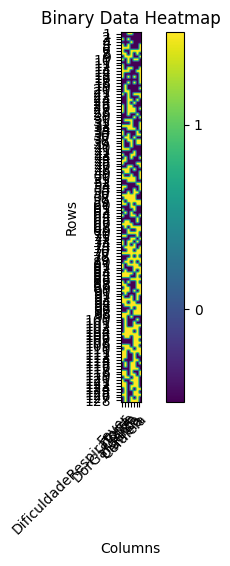

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example binary data matrix
binary_data = matriz_heatmap
binary_data = np.array(binary_data)

# Create the heatmap
fig, ax = plt.subplots()
#heatmap = ax.imshow(binary_data, cmap='binary')
heatmap = ax.imshow(binary_data, cmap='viridis') 

# Add colorbar
cbar = plt.colorbar(heatmap)

# Set labels for x and y axes
ax.set_xticks(np.arange(binary_data.shape[1]))
ax.set_yticks(np.arange(binary_data.shape[0]))
ax.set_xticklabels(['Fever','DificuldadeRespiratoria','Tosse','Coriza','DorGarganta',
                    'Diarreia','Cefaleia']) 
ax.set_yticklabels(np.arange(1, binary_data.shape[0] + 1))

# Set labels for colorbar
cbar.set_ticks([0.25, 0.75])
cbar.set_ticklabels(['0', '1'])

# Rotate and align the x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Set title and axis labels
plt.title("Binary Data Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")

# Display the heatmap
plt.show()


## df_all (sem outcome)

## df_sintomas

In [ ]:
df_sintomas = df_all.loc[:,['Febre',
                            'DificuldadeRespiratoria',
                            'Tosse','Coriza','DorGarganta',
                            'Diarreia','Cefaleia']]
df_sintomas

,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia
409,0,0,0,0,0,0,0
500,0,0,0,0,1,0,1
1135,1,0,1,1,1,0,1
2275,0,0,1,0,0,0,0
3700,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...
1678890,1,0,1,0,0,0,1
1678892,1,1,1,0,1,0,1
1679056,1,1,1,0,0,0,0
1679130,0,0,0,1,0,0,0


In [ ]:
import numpy as np
from sklearn.cluster import KMeans

def optimal_num_clusters(X):
    wcss = []
    for i in range(2, 10):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    diff = np.diff(wcss)
    diff_r = diff[1:] / diff[:-1]
    elbow_index = np.argmin(diff_r) + 1
    return elbow_index

opt_clusters = optimal_num_clusters(df_sintomas)
print("Optimal number of clusters: ", opt_clusters)

Optimal number of clusters:  6


In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Fit and transform the data
X_pca_sintomas = pca.fit_transform(df_sintomas)

# Print the explained variance ratio and the composition of each principal component
print('Explained variance ratio:', pca.explained_variance_ratio_)
print('PC1 composition:', pca.components_[0])
print('PC2 composition:', pca.components_[1])


Explained variance ratio: [0.27062376 0.15954967]
PC1 composition: [0.40500839 0.09136962 0.49778901 0.42121891 0.37705079 0.13648708
 0.49153281]
PC2 composition: [-0.7753471  -0.13551215 -0.15123758  0.48729892  0.28475942 -0.0425064
  0.19299111]


### K-Means

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

def optimal_num_clusters(X):
    wcss = []
    for i in range(1, 21):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    diff = np.diff(wcss)
    diff_r = diff[1:] / diff[:-1]
    elbow_index = np.argmin(diff_r) + 1
    return elbow_index

opt_clusters = optimal_num_clusters(df_sintomas)
print("Optimal number of clusters: ", opt_clusters)


Optimal number of clusters:  9


## Getting the labels

In [ ]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=9, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(df_sintomas)

#view cluster assignments for each observation
kmeans.labels_

array([2, 4, 0, ..., 1, 8, 1], dtype=int32)

In [ ]:
df_sintomas['kmeans_cluster'] = kmeans.labels_
df_sintomas

,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,kmeans_cluster
409,0,0,0,0,0,0,0,2
500,0,0,0,0,1,0,1,4
1135,1,0,1,1,1,0,1,0
2275,0,0,1,0,0,0,0,5
3700,0,0,1,1,1,0,0,3
...,...,...,...,...,...,...,...,...
1678890,1,0,1,0,0,0,1,6
1678892,1,1,1,0,1,0,1,4
1679056,1,1,1,0,0,0,0,1
1679130,0,0,0,1,0,0,0,8


In [ ]:
X_pca_sintomas = pd.DataFrame(data=X_pca_sintomas, columns=['PC1','PC2'])
X_pca_sintomas['cluster'] = kmeans.labels_
X_pca_sintomas

,PC1,PC2,cluster
0,-1.058780,0.089157,2
1,-0.190196,0.566907,4
2,1.133820,0.127622,0
3,-0.560991,-0.062081,5
4,0.237279,0.709978,3
...,...,...,...
188378,0.335550,-0.644437,6
188379,0.803971,-0.495189,4
188380,-0.064613,-0.972940,1
188381,-0.637561,0.576456,8


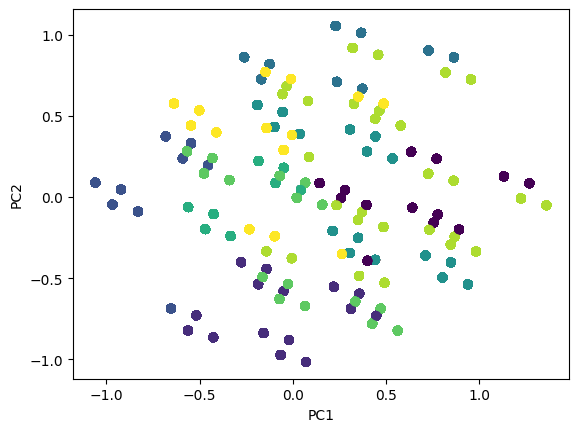

In [ ]:
plt.scatter(X_pca_sintomas['PC1'], X_pca_sintomas['PC2'], c=X_pca_sintomas['cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
lista_clusters = []
total_pessoas = len(df_sintomas)
for i in range(9):
  num_pessoas = len(df_sintomas[df_sintomas['kmeans_cluster'] == (i)])
  frase = '{}% de pesssoas pertencem ao cluster {}.'.format(round((num_pessoas/total_pessoas)*100,2),i)
  lista_clusters.append(frase)


In [ ]:
lista_clusters

['12.16% de pesssoas pertencem ao cluster 0.',
 '9.08% de pesssoas pertencem ao cluster 1.',
 '16.82% de pesssoas pertencem ao cluster 2.',
 '6.47% de pesssoas pertencem ao cluster 3.',
 '10.47% de pesssoas pertencem ao cluster 4.',
 '6.47% de pesssoas pertencem ao cluster 5.',
 '19.64% de pesssoas pertencem ao cluster 6.',
 '6.13% de pesssoas pertencem ao cluster 7.',
 '12.77% de pesssoas pertencem ao cluster 8.']

In [ ]:
# Top-3
df_sintomas_cluster_seis = df_sintomas[df_sintomas['kmeans_cluster']==6]
df_sintomas_cluster_seis = df_sintomas_cluster_seis.reset_index()

df_sintomas_cluster_dois = df_sintomas[df_sintomas['kmeans_cluster']==2]
df_sintomas_cluster_dois = df_sintomas_cluster_dois.reset_index()

df_sintomas_cluster_oito = df_sintomas[df_sintomas['kmeans_cluster']==8]
df_sintomas_cluster_oito = df_sintomas_cluster_oito.reset_index()

# Bottom-3
df_sintomas_cluster_tres = df_sintomas[df_sintomas['kmeans_cluster']==3]
df_sintomas_cluster_tres = df_sintomas_cluster_tres.reset_index()

df_sintomas_cluster_cinco = df_sintomas[df_sintomas['kmeans_cluster']==5]
df_sintomas_cluster_cinco = df_sintomas_cluster_cinco.reset_index()

df_sintomas_cluster_sete = df_sintomas[df_sintomas['kmeans_cluster']==7]
df_sintomas_cluster_sete = df_sintomas_cluster_sete.reset_index()

## Top 3

In [ ]:
colunas = list(df_sintomas_cluster_seis.columns)
colunas = colunas[1:]

lista_de_listas_sintomas =[]
for i in range(len(df_sintomas_cluster_seis)):
  lista_de_sintomas = []
  for col in colunas:
    res = df_sintomas_cluster_seis.loc[i,col]
    lista_de_sintomas.append(res)
  lista_de_listas_sintomas.append(lista_de_sintomas)

lista_sintomas_cluster_seis = []
for item in lista_de_listas_sintomas:
  if item not in lista_sintomas_cluster_seis:
    lista_sintomas_cluster_seis.append(item)

lista_sintomas_cluster_seis

[[1, 0, 1, 0, 0, 0, 1, 6],
 [1, 1, 1, 0, 0, 0, 1, 6],
 [0, 0, 0, 0, 0, 1, 1, 6],
 [0, 0, 1, 0, 0, 0, 1, 6],
 [0, 0, 0, 0, 0, 0, 1, 6],
 [0, 1, 1, 0, 0, 1, 1, 6],
 [1, 1, 1, 0, 0, 1, 1, 6],
 [1, 0, 0, 0, 0, 0, 1, 6],
 [0, 0, 1, 0, 0, 1, 1, 6],
 [1, 0, 1, 0, 0, 1, 1, 6],
 [0, 1, 0, 0, 0, 0, 1, 6],
 [1, 1, 0, 0, 0, 0, 1, 6],
 [1, 0, 0, 0, 0, 1, 1, 6],
 [0, 1, 1, 0, 0, 0, 1, 6],
 [1, 1, 0, 0, 0, 1, 1, 6],
 [0, 1, 0, 0, 0, 1, 1, 6]]

In [ ]:
colunas = list(df_sintomas_cluster_dois.columns)
colunas = colunas[1:]

lista_de_listas_sintomas =[]
for i in range(len(df_sintomas_cluster_dois)):
  lista_de_sintomas = []
  for col in colunas:
    res = df_sintomas_cluster_dois.loc[i,col]
    lista_de_sintomas.append(res)
  lista_de_listas_sintomas.append(lista_de_sintomas)

lista_sintomas_cluster_dois = []
for item in lista_de_listas_sintomas:
  if item not in lista_sintomas_cluster_dois:
    lista_sintomas_cluster_dois.append(item)

lista_sintomas_cluster_dois

[[0, 0, 0, 0, 0, 0, 0, 2],
 [0, 0, 0, 0, 0, 1, 0, 2],
 [1, 0, 0, 0, 0, 0, 0, 2],
 [0, 0, 0, 0, 1, 0, 0, 2],
 [0, 1, 0, 0, 0, 0, 0, 2],
 [0, 1, 0, 0, 0, 1, 0, 2],
 [0, 0, 0, 0, 1, 1, 0, 2],
 [0, 1, 0, 0, 1, 0, 0, 2],
 [0, 1, 0, 0, 1, 1, 0, 2]]

In [ ]:
colunas = list(df_sintomas_cluster_oito.columns)
colunas = colunas[1:]

lista_de_listas_sintomas =[]
for i in range(len(df_sintomas_cluster_oito)):
  lista_de_sintomas = []
  for col in colunas:
    res = df_sintomas_cluster_oito.loc[i,col]
    lista_de_sintomas.append(res)
  lista_de_listas_sintomas.append(lista_de_sintomas)

lista_sintomas_cluster_oito = []
for item in lista_de_listas_sintomas:
  if item not in lista_sintomas_cluster_oito:
    lista_sintomas_cluster_oito.append(item)

lista_sintomas_cluster_oito

[[0, 0, 1, 1, 0, 0, 1, 8],
 [0, 0, 1, 1, 0, 0, 0, 8],
 [0, 0, 0, 1, 0, 0, 1, 8],
 [0, 0, 0, 1, 0, 0, 0, 8],
 [0, 1, 1, 1, 0, 0, 0, 8],
 [0, 0, 1, 1, 0, 1, 0, 8],
 [1, 0, 1, 1, 0, 0, 0, 8],
 [1, 0, 0, 1, 0, 0, 0, 8],
 [0, 0, 1, 1, 0, 1, 1, 8],
 [0, 0, 0, 1, 0, 1, 1, 8],
 [1, 0, 0, 1, 0, 1, 0, 8],
 [0, 1, 0, 1, 0, 0, 0, 8],
 [0, 0, 0, 1, 0, 1, 0, 8],
 [0, 1, 0, 1, 0, 1, 0, 8]]

## Bottom 3

In [ ]:
colunas = list(df_sintomas_cluster_sete.columns)
colunas = colunas[1:]

lista_de_listas_sintomas =[]
for i in range(len(df_sintomas_cluster_sete)):
  lista_de_sintomas = []
  for col in colunas:
    res = df_sintomas_cluster_sete.loc[i,col]
    lista_de_sintomas.append(res)
  lista_de_listas_sintomas.append(lista_de_sintomas)

lista_sintomas_cluster_sete = []
for item in lista_de_listas_sintomas:
  if item not in lista_sintomas_cluster_sete:
    lista_sintomas_cluster_sete.append(item)

lista_sintomas_cluster_sete

[[1, 1, 0, 1, 0, 1, 0, 7],
 [0, 1, 1, 1, 0, 0, 1, 7],
 [0, 1, 1, 1, 1, 0, 1, 7],
 [1, 1, 1, 1, 1, 0, 1, 7],
 [1, 1, 1, 1, 1, 0, 0, 7],
 [1, 1, 1, 1, 0, 0, 1, 7],
 [1, 1, 1, 1, 0, 1, 0, 7],
 [0, 1, 1, 1, 1, 1, 1, 7],
 [1, 1, 0, 1, 0, 0, 0, 7],
 [1, 1, 0, 1, 1, 1, 0, 7],
 [0, 1, 1, 1, 1, 0, 0, 7],
 [1, 1, 1, 1, 1, 1, 1, 7],
 [0, 1, 0, 1, 0, 0, 1, 7],
 [1, 1, 0, 1, 1, 0, 1, 7],
 [0, 1, 0, 1, 1, 0, 1, 7],
 [1, 1, 1, 1, 0, 1, 1, 7],
 [0, 1, 1, 1, 1, 1, 0, 7],
 [1, 1, 0, 1, 0, 1, 1, 7],
 [1, 1, 1, 1, 0, 0, 0, 7],
 [0, 1, 0, 1, 1, 1, 1, 7],
 [0, 1, 0, 1, 0, 1, 1, 7],
 [1, 1, 1, 1, 1, 1, 0, 7],
 [0, 1, 1, 1, 0, 1, 1, 7],
 [1, 1, 0, 1, 1, 0, 0, 7],
 [1, 1, 0, 1, 0, 0, 1, 7],
 [0, 1, 1, 1, 0, 1, 0, 7],
 [0, 1, 0, 1, 1, 1, 0, 7],
 [1, 1, 0, 1, 1, 1, 1, 7]]

In [ ]:
colunas = list(df_sintomas_cluster_cinco.columns)
colunas = colunas[1:]

lista_de_listas_sintomas =[]
for i in range(len(df_sintomas_cluster_cinco)):
  lista_de_sintomas = []
  for col in colunas:
    res = df_sintomas_cluster_cinco.loc[i,col]
    lista_de_sintomas.append(res)
  lista_de_listas_sintomas.append(lista_de_sintomas)

lista_sintomas_cluster_cinco = []
for item in lista_de_listas_sintomas:
  if item not in lista_sintomas_cluster_cinco:
    lista_sintomas_cluster_cinco.append(item)

lista_sintomas_cluster_cinco

[[0, 0, 1, 0, 0, 0, 0, 5],
 [0, 0, 1, 0, 0, 1, 0, 5],
 [0, 1, 1, 0, 0, 0, 0, 5],
 [0, 0, 1, 0, 1, 0, 0, 5],
 [0, 1, 1, 0, 1, 0, 0, 5],
 [0, 0, 1, 0, 1, 1, 0, 5],
 [0, 1, 1, 0, 0, 1, 0, 5],
 [0, 1, 1, 0, 1, 1, 0, 5]]

In [ ]:
colunas = list(df_sintomas_cluster_tres.columns)
colunas = colunas[1:]

lista_de_listas_sintomas =[]
for i in range(len(df_sintomas_cluster_tres)):
  lista_de_sintomas = []
  for col in colunas:
    res = df_sintomas_cluster_tres.loc[i,col]
    lista_de_sintomas.append(res)
  lista_de_listas_sintomas.append(lista_de_sintomas)

lista_sintomas_cluster_tres = []
for item in lista_de_listas_sintomas:
  if item not in lista_sintomas_cluster_tres:
    lista_sintomas_cluster_tres.append(item)

lista_sintomas_cluster_tres

[[0, 0, 1, 1, 1, 0, 0, 3],
 [0, 0, 1, 1, 1, 0, 1, 3],
 [0, 0, 0, 1, 1, 0, 1, 3],
 [0, 0, 0, 1, 1, 1, 0, 3],
 [0, 0, 1, 1, 1, 1, 1, 3],
 [0, 0, 0, 1, 1, 0, 0, 3],
 [0, 0, 1, 1, 1, 1, 0, 3],
 [0, 0, 0, 1, 1, 1, 1, 3],
 [0, 1, 0, 1, 1, 0, 0, 3]]

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances

# Compute the Jaccard distance between pairs of observations
distance_matrix = pairwise_distances(df_sintomas)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5, metric='precomputed')
dbscan.fit(distance_matrix)

# Get the labels for each observation
db_labels = dbscan.labels_


Putting the labels

In [ ]:
df_sintomas['dbscan_labels'] = db_labels
df_sintomas

### Hierarchical

In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

# Compute the Jaccard distance between pairs of observations
distance_matrix = pdist(df_sintomas, metric='jaccard')

# Link the clusters using complete linkage
linkage_matrix = linkage(distance_matrix, method='complete')

# Plot the dendrogram
dendrogram(linkage_matrix)

In [ ]:
from scipy.cluster.hierarchy import fcluster, linkage

# Get the cluster labels for each observation
num_clusters = 9  # Set the number of clusters you want to have
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Add the cluster labels as a new column to the dataset
data['cluster'] = cluster_labels

## df_cronicas

In [ ]:
df_cronicas

,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade
409,0,0,0,0,0,0
500,0,0,0,0,0,0
1135,0,0,0,0,0,0
2275,0,0,0,0,0,0
3700,0,0,0,0,0,0
...,...,...,...,...,...,...
1678890,0,0,0,0,0,0
1678892,0,0,0,0,0,0
1679056,0,0,0,0,0,0
1679130,0,0,0,0,0,0


In [ ]:
df_cronicas = df_cronicas[(df_cronicas['ComorbidadeCardio']!=0) | 
                          (df_cronicas['ComorbidadeDiabetes']!=0) | 
                          (df_cronicas['ComorbidadeObesidade']!=0) | 
                          (df_cronicas['ComorbidadePulmao']!=0) | 
                          (df_cronicas['ComorbidadeRenal']!=0) | 
                          (df_cronicas['ComorbidadeTabagismo']!=0)]
df_cronicas

,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade
7424,0,0,0,0,0,1
8375,0,1,0,0,0,1
8563,0,0,0,0,0,1
9908,0,1,0,0,0,0
11917,0,1,0,1,0,0
...,...,...,...,...,...,...
1678234,0,0,0,0,0,1
1678334,0,1,0,0,0,0
1678339,0,1,1,1,0,0
1678603,0,0,0,1,0,0


In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Fit and transform the data
X_pca_cronicas = pca.fit_transform(df_cronicas)

# Print the explained variance ratio and the composition of each principal component
print('Explained variance ratio:', pca.explained_variance_ratio_)
print('PC1 composition:', pca.components_[0])
print('PC2 composition:', pca.components_[1])

Explained variance ratio: [0.33380135 0.27564302]
PC1 composition: [ 0.35513179 -0.86126811  0.00155725 -0.22429315  0.20581494  0.19856741]
PC2 composition: [-0.04655186 -0.26968263  0.01129021  0.96143564 -0.01754146  0.01762191]


In [ ]:
import numpy as np
from sklearn.cluster import KMeans

def optimal_num_clusters(X):
    wcss = []
    for i in range(1, 21):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    diff = np.diff(wcss)
    diff_r = diff[1:] / diff[:-1]
    elbow_index = np.argmin(diff_r) + 1
    return elbow_index

opt_clusters = optimal_num_clusters(df_cronicas)
print("Optimal number of clusters: ", opt_clusters)

Optimal number of clusters:  9


In [ ]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=9, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(df_cronicas)

#view cluster assignments for each observation
kmeans.labels_

array([1, 8, 1, ..., 3, 4, 8], dtype=int32)

In [ ]:
df_cronicas['cluster'] = kmeans.labels_
df_cronicas

<ipython-input-113-e0584d7abcaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cronicas['cluster'] = kmeans.labels_


,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,cluster
7424,0,0,0,0,0,1,1
8375,0,1,0,0,0,1,8
8563,0,0,0,0,0,1,1
9908,0,1,0,0,0,0,0
11917,0,1,0,1,0,0,2
...,...,...,...,...,...,...,...
1678234,0,0,0,0,0,1,1
1678334,0,1,0,0,0,0,0
1678339,0,1,1,1,0,0,3
1678603,0,0,0,1,0,0,4


In [ ]:
X_pca_cronicas = pd.DataFrame(data=X_pca_cronicas, columns=['PC1','PC2'])
X_pca_cronicas['cluster'] = kmeans.labels_
X_pca_cronicas

,PC1,PC2,cluster
0,0.790666,-0.044431,1
1,-0.070602,-0.314114,8
2,0.790666,-0.044431,1
3,-0.269170,-0.331736,0
4,-0.493463,0.629700,2
...,...,...,...
47428,0.790666,-0.044431,1
47429,-0.269170,-0.331736,0
47430,-0.491906,0.640990,3
47431,0.367805,0.899383,4


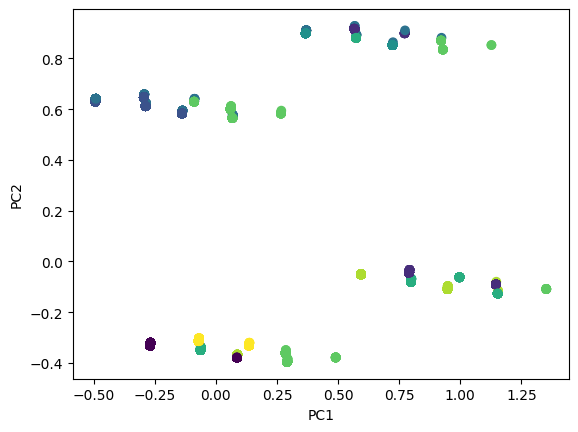

In [ ]:
plt.scatter(X_pca_cronicas['PC1'], X_pca_cronicas['PC2'], c=X_pca_cronicas['cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
lista_clusters = []
total_pessoas = len(df_cronicas)
for i in range(9):
  num_pessoas = len(df_cronicas[df_cronicas['cluster'] == (i)])
  frase = '{}% de pesssoas pertencem ao cluster {}.'.format(round((num_pessoas/total_pessoas)*100,2),i)
  lista_clusters.append(frase)

lista_clusters

['46.95% de pesssoas pertencem ao cluster 0.',
 '6.62% de pesssoas pertencem ao cluster 1.',
 '18.17% de pesssoas pertencem ao cluster 2.',
 '0.78% de pesssoas pertencem ao cluster 3.',
 '6.98% de pesssoas pertencem ao cluster 4.',
 '7.2% de pesssoas pertencem ao cluster 5.',
 '0.95% de pesssoas pertencem ao cluster 6.',
 '8.48% de pesssoas pertencem ao cluster 7.',
 '3.87% de pesssoas pertencem ao cluster 8.']

In [ ]:
# Top-3
df_cronicas_cluster_zero = df_cronicas[df_cronicas['cluster']==0]
df_cronicas_cluster_zero = df_cronicas_cluster_zero.reset_index()

df_cronicas_cluster_dois = df_cronicas[df_cronicas['cluster']==2]
df_cronicas_cluster_dois = df_cronicas_cluster_dois.reset_index()

df_cronicas_cluster_sete = df_cronicas[df_cronicas['cluster']==7]
df_cronicas_cluster_sete = df_cronicas_cluster_sete.reset_index()

# Bottom-3
df_cronicas_cluster_tres = df_cronicas[df_cronicas['cluster']==3]
df_cronicas_cluster_tres = df_cronicas_cluster_tres.reset_index()

df_cronicas_cluster_seis = df_cronicas[df_cronicas['cluster']==6]
df_cronicas_cluster_seis = df_cronicas_cluster_seis.reset_index()

df_cronicas_cluster_oito = df_cronicas[df_cronicas['cluster']==8]
df_cronicas_cluster_oito = df_cronicas_cluster_oito.reset_index()

In [ ]:
colunas = list(df_cronicas_cluster_zero.columns)
colunas = colunas[1:]

lista_de_listas_cronicas =[]
for i in range(len(df_cronicas_cluster_zero)):
  lista_de_cronicas = []
  for col in colunas:
    res = df_cronicas_cluster_zero.loc[i,col]
    lista_de_cronicas.append(res)
  lista_de_listas_cronicas.append(lista_de_cronicas)

lista_cronicas_cluster_zero = []
for item in lista_de_listas_cronicas:
  if item not in lista_cronicas_cluster_zero:
    lista_cronicas_cluster_zero.append(item)

lista_cronicas_cluster_zero

[[0, 1, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0]]

In [ ]:
colunas = list(df_cronicas_cluster_dois.columns)
colunas = colunas[1:]

lista_de_listas_cronicas =[]
for i in range(len(df_cronicas_cluster_dois)):
  lista_de_cronicas = []
  for col in colunas:
    res = df_cronicas_cluster_dois.loc[i,col]
    lista_de_cronicas.append(res)
  lista_de_listas_cronicas.append(lista_de_cronicas)

lista_cronicas_cluster_dois = []
for item in lista_de_listas_cronicas:
  if item not in lista_cronicas_cluster_dois:
    lista_cronicas_cluster_dois.append(item)

lista_cronicas_cluster_dois

[[0, 1, 0, 1, 0, 0, 2],
 [0, 1, 0, 1, 1, 0, 2],
 [0, 1, 0, 1, 0, 1, 2],
 [1, 1, 0, 1, 0, 0, 2]]

In [ ]:
colunas = list(df_cronicas_cluster_sete.columns)
colunas = colunas[1:]

lista_de_listas_cronicas =[]
for i in range(len(df_cronicas_cluster_sete)):
  lista_de_cronicas = []
  for col in colunas:
    res = df_cronicas_cluster_sete.loc[i,col]
    lista_de_cronicas.append(res)
  lista_de_listas_cronicas.append(lista_de_cronicas)

lista_cronicas_cluster_sete = []
for item in lista_de_listas_cronicas:
  if item not in lista_cronicas_cluster_sete:
    lista_cronicas_cluster_sete.append(item)

lista_cronicas_cluster_sete

[[1, 0, 0, 0, 0, 0, 7],
 [0, 0, 1, 0, 0, 0, 7],
 [1, 0, 1, 0, 0, 0, 7],
 [1, 1, 1, 0, 0, 0, 7],
 [1, 0, 1, 0, 0, 1, 7],
 [1, 0, 1, 0, 1, 0, 7]]

In [ ]:
colunas = list(df_cronicas_cluster_tres.columns)
colunas = colunas[1:]

lista_de_listas_cronicas =[]
for i in range(len(df_cronicas_cluster_tres)):
  lista_de_cronicas = []
  for col in colunas:
    res = df_cronicas_cluster_tres.loc[i,col]
    lista_de_cronicas.append(res)
  lista_de_listas_cronicas.append(lista_de_cronicas)

lista_cronicas_cluster_tres = []
for item in lista_de_listas_cronicas:
  if item not in lista_cronicas_cluster_tres:
    lista_cronicas_cluster_tres.append(item)

lista_cronicas_cluster_tres

[[0, 1, 1, 1, 0, 0, 3],
 [0, 0, 1, 1, 0, 0, 3],
 [0, 1, 1, 1, 1, 0, 3],
 [0, 1, 1, 1, 0, 1, 3],
 [1, 1, 1, 1, 0, 0, 3],
 [0, 1, 1, 1, 1, 1, 3],
 [0, 0, 1, 1, 1, 0, 3],
 [1, 0, 1, 1, 0, 1, 3],
 [1, 1, 1, 1, 1, 0, 3],
 [0, 0, 1, 1, 0, 1, 3],
 [1, 0, 1, 1, 0, 0, 3],
 [0, 0, 1, 1, 1, 1, 3]]

In [ ]:
colunas = list(df_cronicas_cluster_seis.columns)
colunas = colunas[1:]

lista_de_listas_cronicas =[]
for i in range(len(df_cronicas_cluster_seis)):
  lista_de_cronicas = []
  for col in colunas:
    res = df_cronicas_cluster_seis.loc[i,col]
    lista_de_cronicas.append(res)
  lista_de_listas_cronicas.append(lista_de_cronicas)

lista_cronicas_cluster_seis = []
for item in lista_de_listas_cronicas:
  if item not in lista_cronicas_cluster_seis:
    lista_cronicas_cluster_seis.append(item)

lista_cronicas_cluster_seis

[[1, 0, 0, 1, 0, 1, 6],
 [1, 1, 0, 0, 1, 0, 6],
 [1, 1, 0, 0, 0, 1, 6],
 [1, 1, 0, 1, 0, 1, 6],
 [0, 1, 0, 1, 1, 1, 6],
 [1, 1, 0, 0, 1, 1, 6],
 [1, 0, 0, 1, 1, 1, 6],
 [1, 0, 0, 0, 1, 1, 6],
 [1, 0, 0, 1, 1, 0, 6],
 [1, 1, 0, 1, 1, 0, 6],
 [1, 1, 1, 0, 1, 0, 6],
 [1, 1, 1, 0, 0, 1, 6],
 [1, 1, 0, 1, 1, 1, 6],
 [1, 1, 1, 1, 0, 1, 6],
 [1, 1, 1, 1, 1, 1, 6]]

In [ ]:
colunas = list(df_cronicas_cluster_oito.columns)
colunas = colunas[1:]

lista_de_listas_cronicas =[]
for i in range(len(df_cronicas_cluster_oito)):
  lista_de_cronicas = []
  for col in colunas:
    res = df_cronicas_cluster_oito.loc[i,col]
    lista_de_cronicas.append(res)
  lista_de_listas_cronicas.append(lista_de_cronicas)

lista_cronicas_cluster_oito = []
for item in lista_de_listas_cronicas:
  if item not in lista_cronicas_cluster_oito:
    lista_cronicas_cluster_oito.append(item)

lista_cronicas_cluster_oito

[[0, 1, 0, 0, 0, 1, 8],
 [0, 1, 0, 0, 1, 1, 8],
 [0, 1, 1, 0, 0, 1, 8],
 [0, 1, 1, 0, 1, 1, 8]]

# Matriz Correlação

<Axes: >

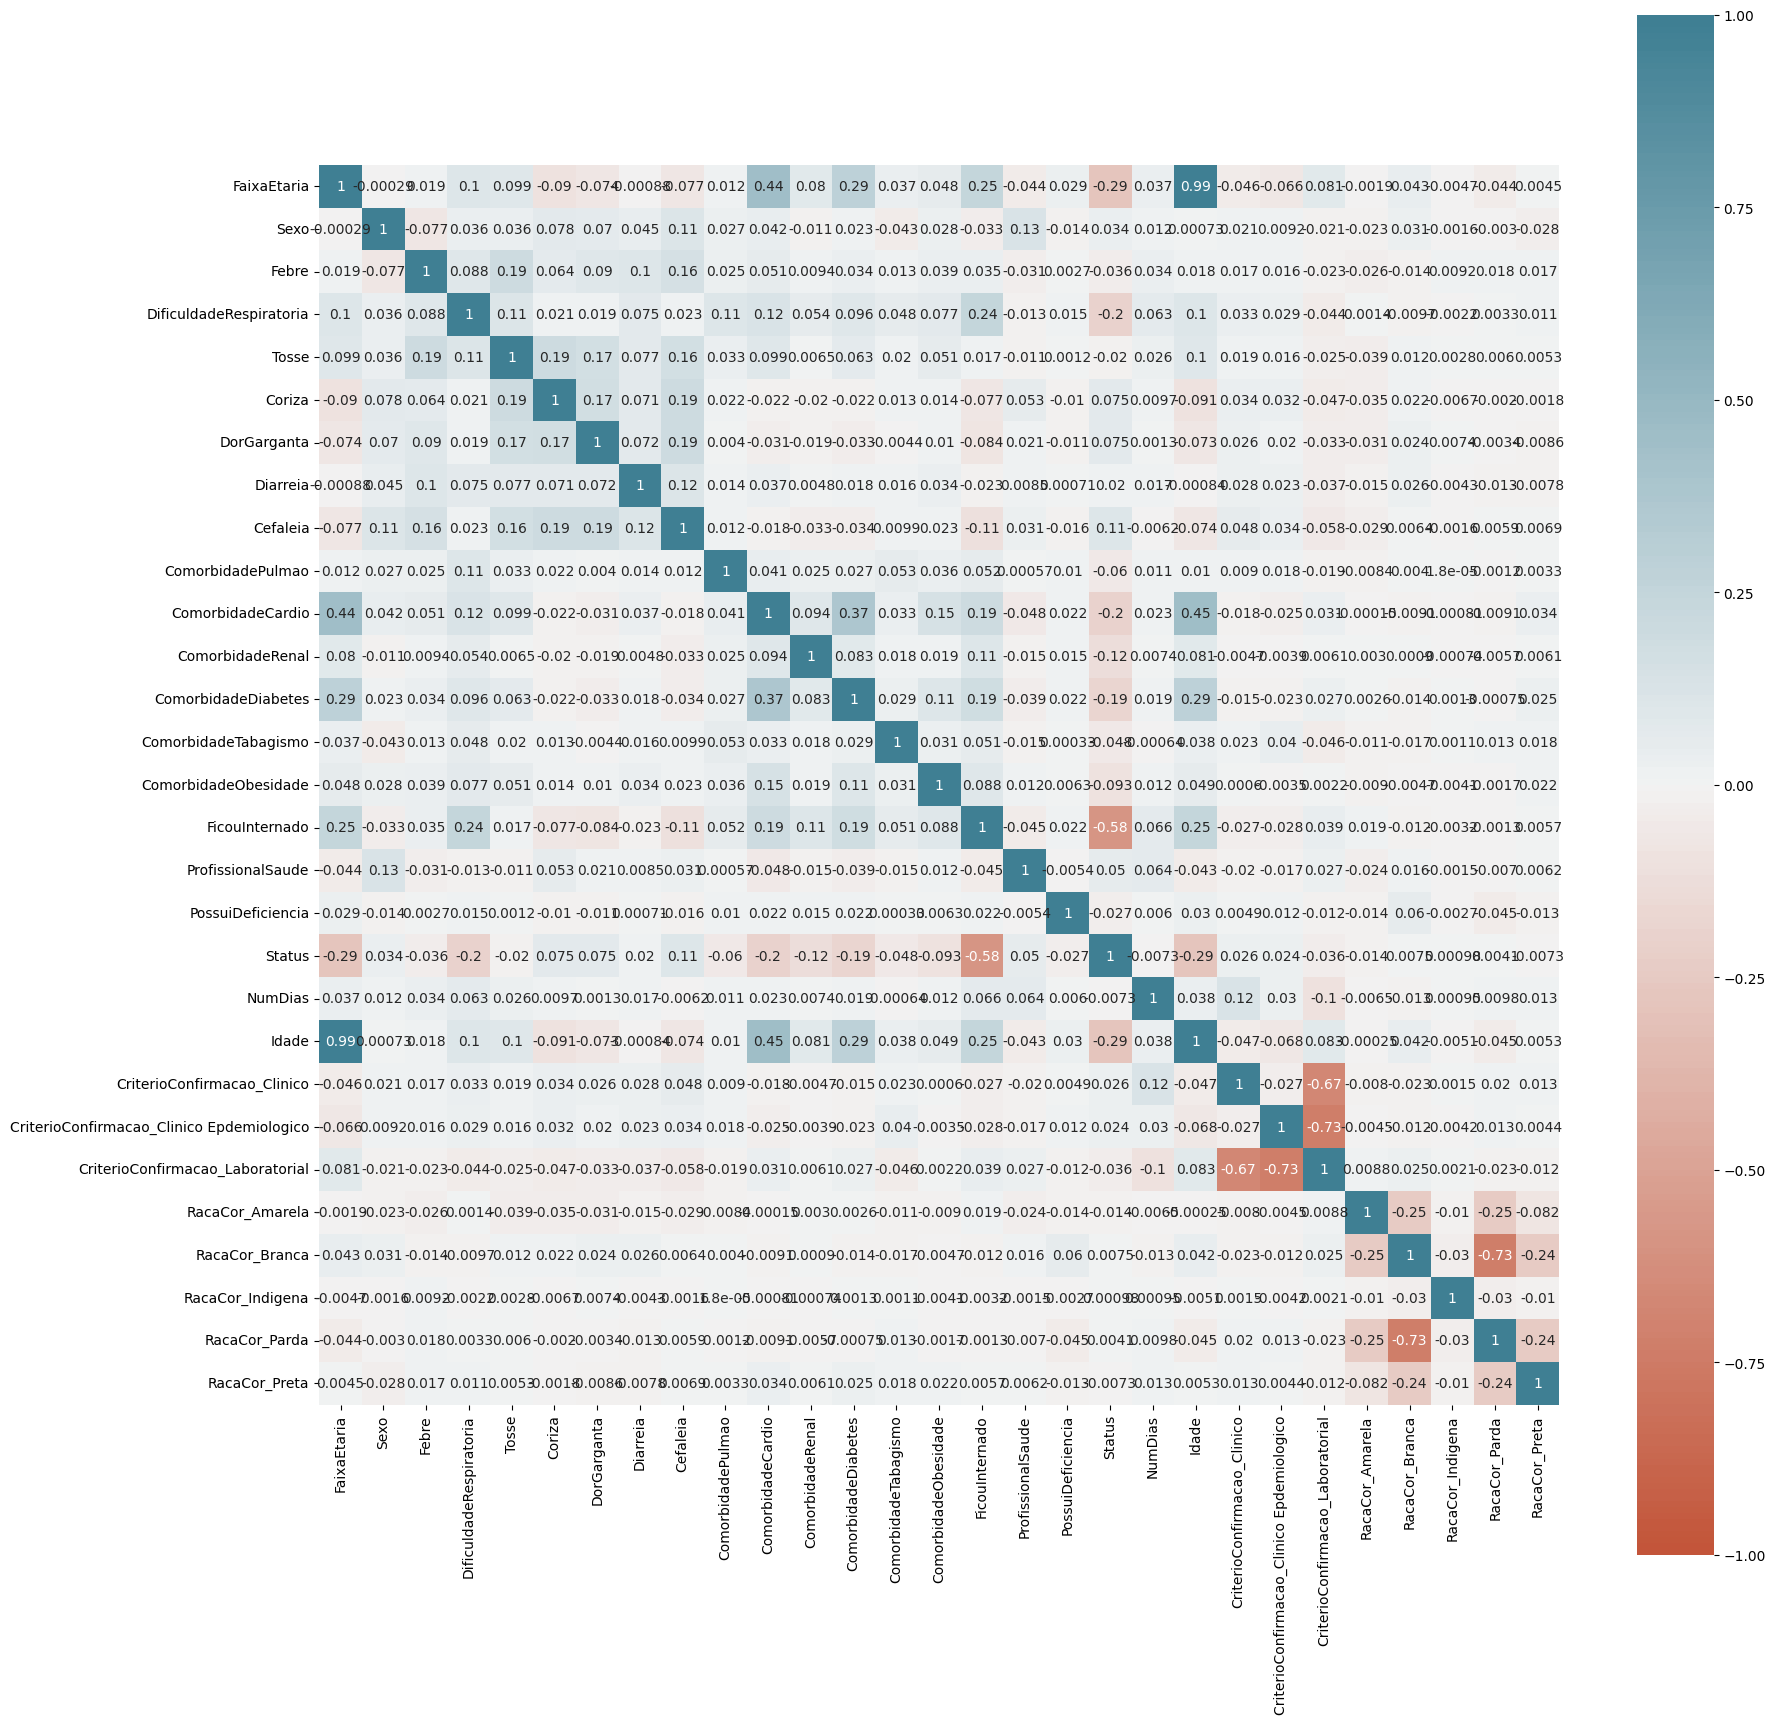

In [ ]:
corr_matrix = df_all.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,annot=True)